In [ ]:
#1.Schema & Types:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/ Login page ICT Assignment /Waqas Ahmad /_Amazon_Clothing_Sales_2025 DS12  - Amazon_Clothing_Sales_2025.csv")
df.head()

,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,price,quantity,discount_percent,final_price,payment_method,review_rating,order_date,delivery_days,is_returned,region,customer_age_group,device_type
0,#HLWTRIGAJB0RFL,A86556872001,6Q3V14RXRF,Huggies Rompers,baby,Rompers,Huggies,118.62,1,10,106.76,PayPal,3,2024-09-10,5.0,0,Midwest,25-34,Mobile
1,#9LMWG6T6H0IPE0,0A9218115AAA,33MRMEM3WN,Gerber Blankets,Baby,Blankets,Gerber,26.84,1,15,22.81,Gift Card,2,2025-06-25,8.0,0,West,25-34,Mobile
2,#Q6J5C5621SSE5V,8A5A09200074,E674NZH16V,Fossil Jeans,Men,Jeans,Fossil,219.38,2,25,329.07,Gift Card,4,2025-01-08,5.0,0,Northeast,35-44,Mobile
3,#J145DOUKB5RVBN,97602786977A,ETMIXJHFAT,Carter's Rompers,Baby,Rompers,Carter's,12.05,1,0,12.05,Credit Card,5,2024-08-28,3.0,0,Midwest,45-54,Mobile
4,#7ZXNMSUU22AK4J,744297746010,5BYOWYYY5P,Adidas Sneakers,Kids,Sneakers,Adidas,145.36,1,10,130.82,Credit Card,1,2024-11-12,5.0,0,NaN,45-54,Mobile


In [ ]:
 #Check data types
df.dtypes


,0
order_id,object
customer_id,object
product_id,object
product_name,object
main_category,object
sub_category,object
brand,object
price,float64
quantity,int64
discount_percent,int64


In [ ]:
# Convert order_date to datetime
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")

In [ ]:
#2.Missing Values:

In [ ]:
# Quantify missingness per column
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean()*100).round(2)
missing_info = pd.DataFrame({"Missing Count": missing, "Missing %": missing_percent})
print(missing_info)

                    Missing Count  Missing %
brand                        1250        5.0
customer_age_group           1250        5.0
customer_id                     0        0.0
delivery_days                 250        1.0
device_type                  1250        5.0
discount_percent                0        0.0
final_price                     0        0.0
is_returned                     0        0.0
main_category                   0        0.0
order_date                      0        0.0
order_id                        0        0.0
payment_method               1250        5.0
price                         250        1.0
product_id                      0        0.0
product_name                    0        0.0
quantity                        0        0.0
region                       1250        5.0
review_rating                   0        0.0
sub_category                    0        0.0


In [ ]:
# Decide strategy: example - fill numeric with median, categorical with mode
for col in df.select_dtypes(include="number"):
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(exclude="number"):
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-3319114389.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3319114389.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
#3.Duplicates & Integrity:

In [ ]:
# Check duplicates
duplicates_count = df.duplicated().sum()
print(f"Duplicate rows: {duplicates_count}")

Duplicate rows: 0


In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Validate price, discount_percent, final_price
df["calculated_final_price"] = df["price"] * (1 - df["discount_percent"] / 100)
df["price_match"] = abs(df["calculated_final_price"] - df["final_price"]) < 0.01
print(f"Price mismatch count: {len(df[~df['price_match']])}")

Price mismatch count: 16782


In [ ]:
#4.Outliers

In [ ]:
# Example: Using IQR method for price
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df["price"] < Q1 - 1.5*IQR) | (df["price"] > Q3 + 1.5*IQR)]
print(f"Outlier count in price: {len(outliers)}")

Outlier count in price: 0


In [ ]:
#6.Feature Engineering

In [ ]:
# Extract date parts
df["order_month"] = df["order_date"].dt.month
df["order_weekday"] = df["order_date"].dt.day_name()
df["order_year"] = df["order_date"].dt.year

In [ ]:
# Compute discount amount
df["discount_amount"] = df["price"] * df["discount_percent"] / 100

In [ ]:
# Create unit price
df["unit_price"] = df["final_price"] / df["quantity"]

In [ ]:
# Flag fast vs slow delivery
df["delivery_speed"] = df["delivery_days"].apply(lambda x: "fast" if x <= 3 else "slow")

In [ ]:
# Customer-level aggregates
customer_stats = df.groupby("customer_id").agg(
    total_spend=("final_price", "sum"),
    total_orders=("order_id", "nunique"),
    avg_rating=("review_rating", "mean"),
    return_rate=("is_returned", "mean")
).reset_index()

print(customer_stats.head())

    customer_id  total_spend  total_orders  avg_rating  return_rate
0  0000A5486A60       565.98             1         2.0          0.0
1  000128A482A9       343.10             1         3.0          0.0
2  0006310A3377       203.02             1         5.0          0.0
3  00069A393862       541.82             1         3.0          0.0
4  00070A643221        86.88             1         4.0          0.0


In [ ]:
#Save Cleaned data

In [ ]:
df.to_csv("amazon_clothing_sales_cleaned.csv", index=False)

In [ ]:
#B.Univariate Analysis

In [ ]:
#Numerical Variable Analysis

In [ ]:
# Select numerical columns to analyze
numerical_cols = ['price', 'final_price', 'discount_percent', 'review_rating', 'delivery_days']


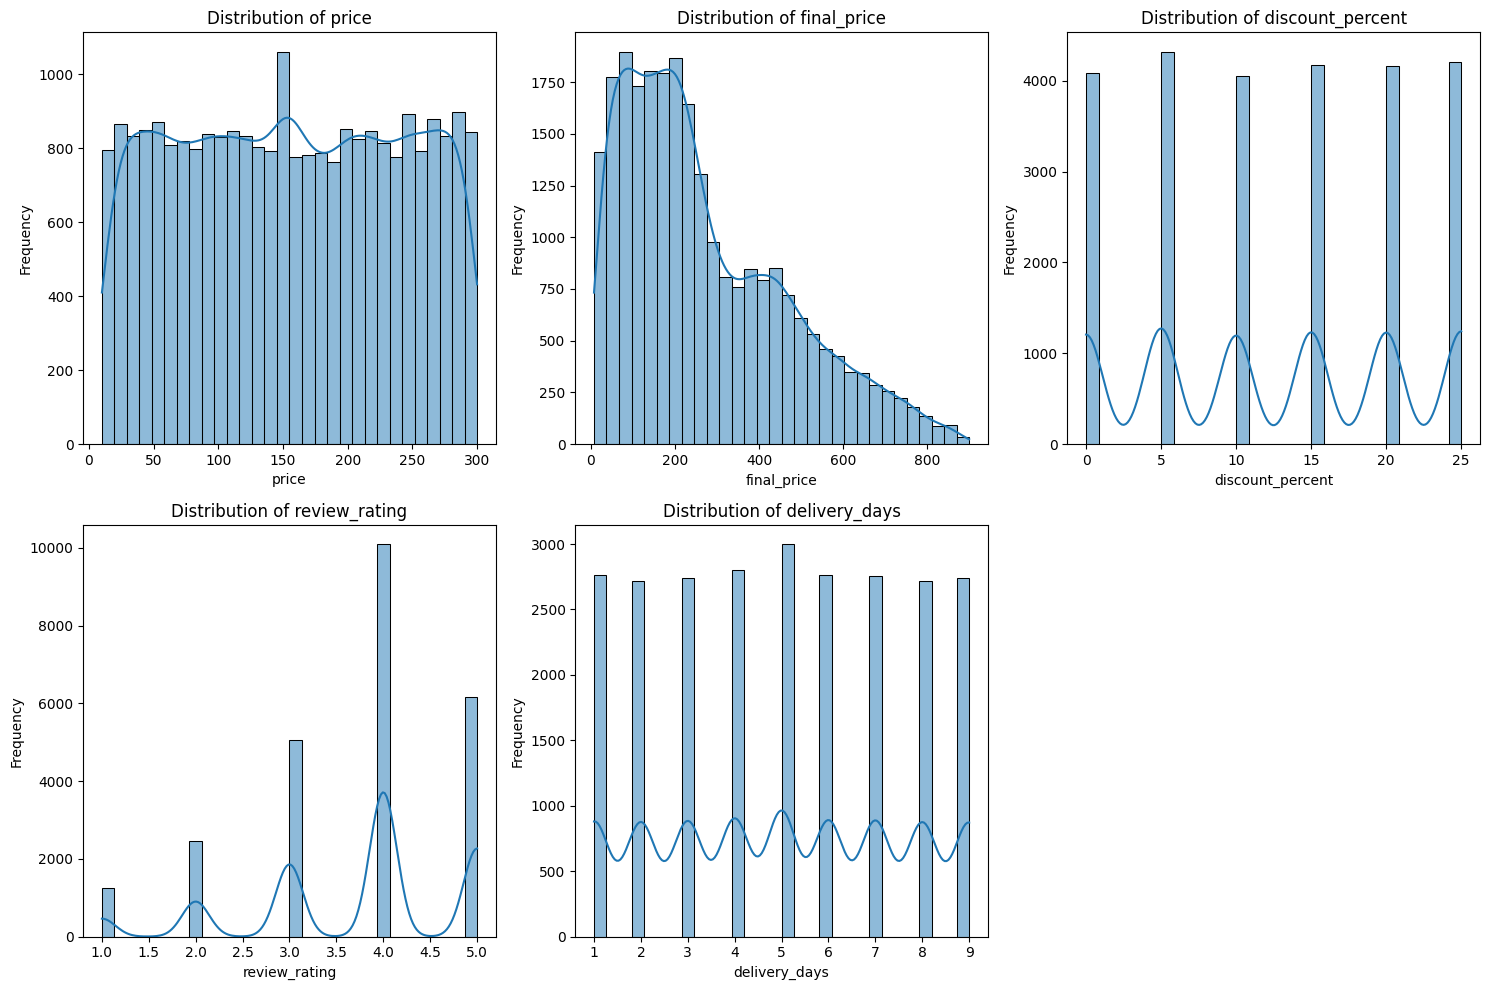

In [ ]:
# Create distribution plots for each numerical variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

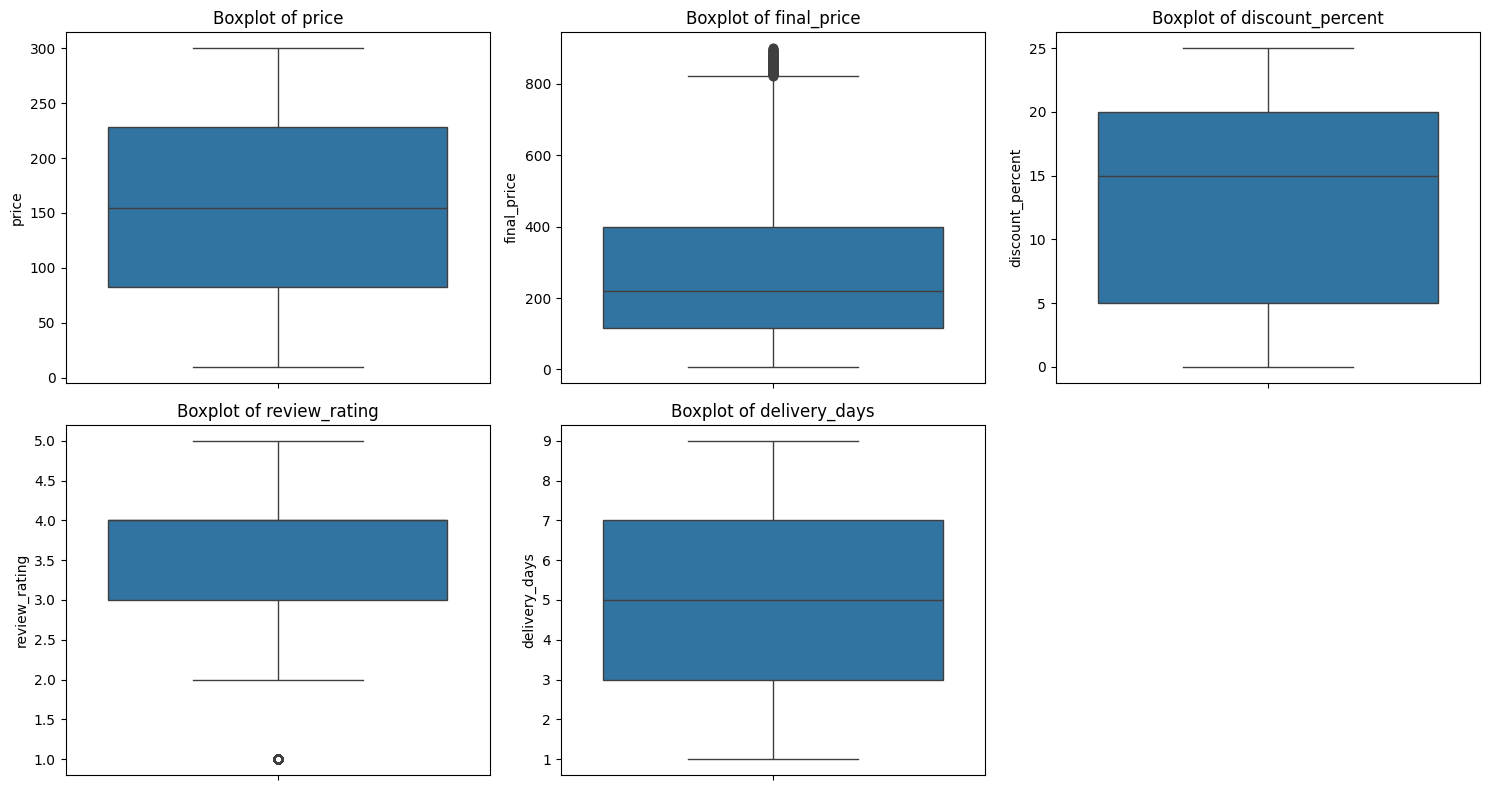

In [ ]:
# Create boxplots to identify outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Generate descriptive statistics
numerical_stats = df[numerical_cols].describe().transpose()
numerical_stats['skewness'] = df[numerical_cols].skew()
numerical_stats['kurtosis'] = df[numerical_cols].kurt()
print(numerical_stats)

                    count        mean         std    min       25%      50%  \
price             25000.0  155.390002   84.020554  10.02   82.8875  154.805   
final_price       25000.0  271.491812  196.188476   7.53  116.2475  219.410   
discount_percent  25000.0   12.527400    8.543663   0.00    5.0000   15.000   
review_rating     25000.0    3.698040    1.095641   1.00    3.0000    4.000   
delivery_days     25000.0    4.994920    2.565314   1.00    3.0000    5.000   

                      75%     max  skewness  kurtosis  
price             228.245  299.98  0.000686 -1.206342  
final_price       398.565  899.79  0.868055  0.000085  
discount_percent   20.000   25.00  0.001742 -1.275415  
review_rating       4.000    5.00 -0.744158 -0.063051  
delivery_days       7.000    9.00  0.002100 -1.205786  


In [ ]:
#Returned vs Non-Returned Proportion

In [ ]:
# Calculate return proportions
return_prop = df['is_returned'].value_counts(normalize=True).mul(100)

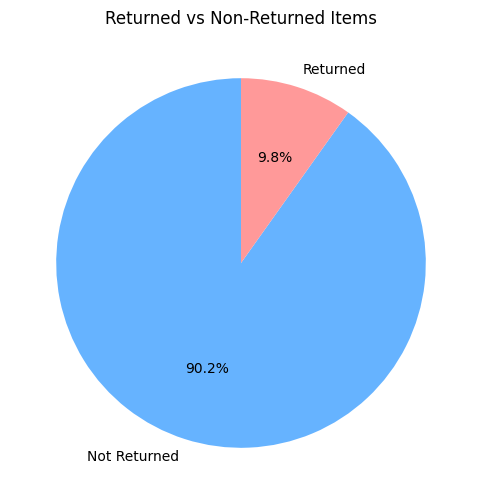

In [ ]:
# Visualization
plt.figure(figsize=(8, 6))
plt.pie(return_prop, labels=['Not Returned', 'Returned'],
        autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Returned vs Non-Returned Items')
plt.show()

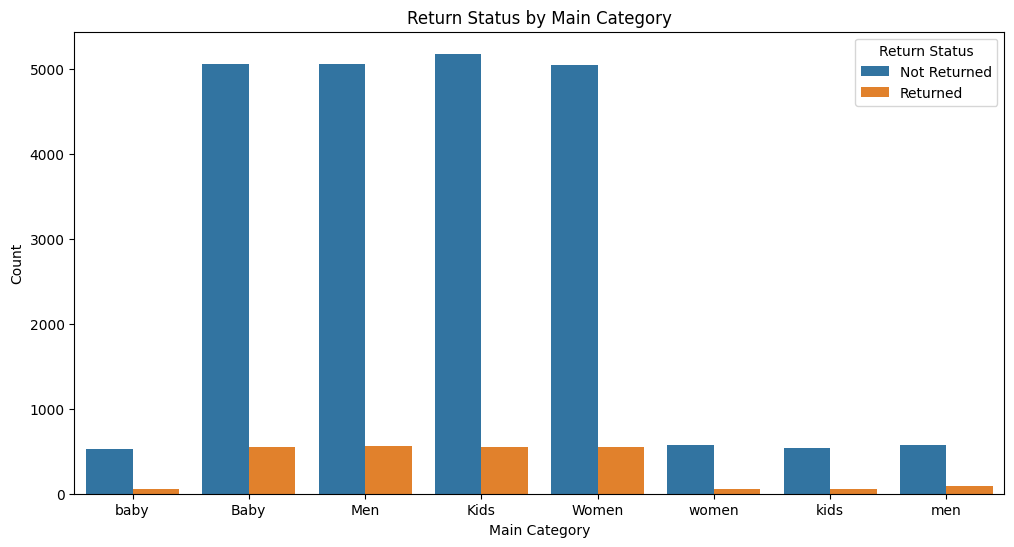

In [ ]:
# Additional analysis by category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='main_category', hue='is_returned')
plt.title('Return Status by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.legend(title='Return Status', labels=['Not Returned', 'Returned'])
plt.show()

In [ ]:
#C. Bivariate & Multivariate Analysis

In [ ]:
#Sales performance Analysis

In [ ]:
#Revenue over time (monthly / weekly trend).
# Convert order_date to datetime and extract time periods
df['order_date'] = pd.to_datetime(df['order_date'])
df['month'] = df['order_date'].dt.to_period('M')
df['week'] = df['order_date'].dt.to_period('W')

In [ ]:
# Calculate revenue (final_price * quantity)
df['revenue'] = df['final_price'] * df['quantity']

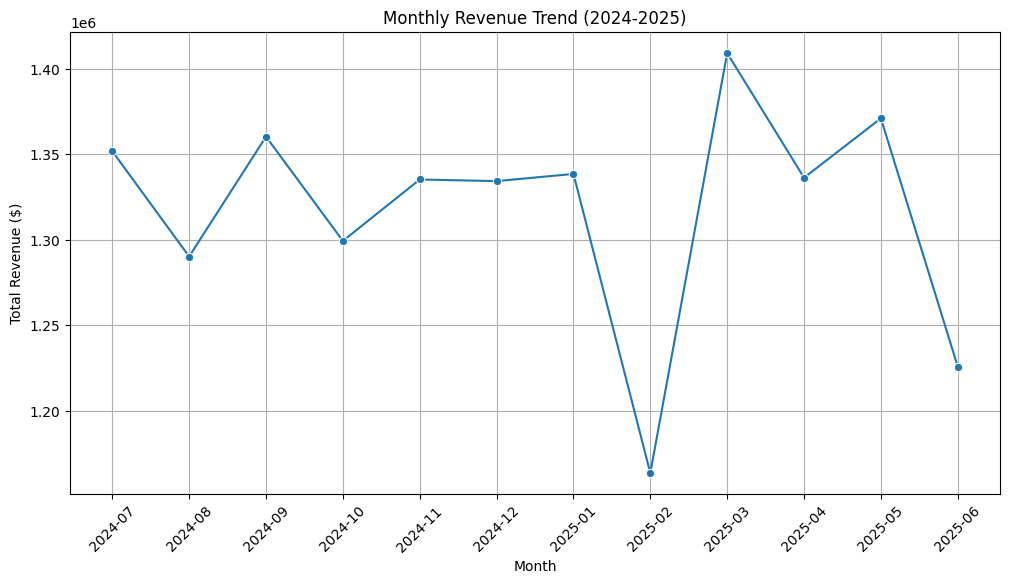

In [ ]:
# Monthly revenue trend
monthly_revenue = df.groupby('month')['revenue'].sum().reset_index()
monthly_revenue['month'] = monthly_revenue['month'].astype(str) # Convert Period to string
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='month', y='revenue', marker='o')
plt.title('Monthly Revenue Trend (2024-2025)')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

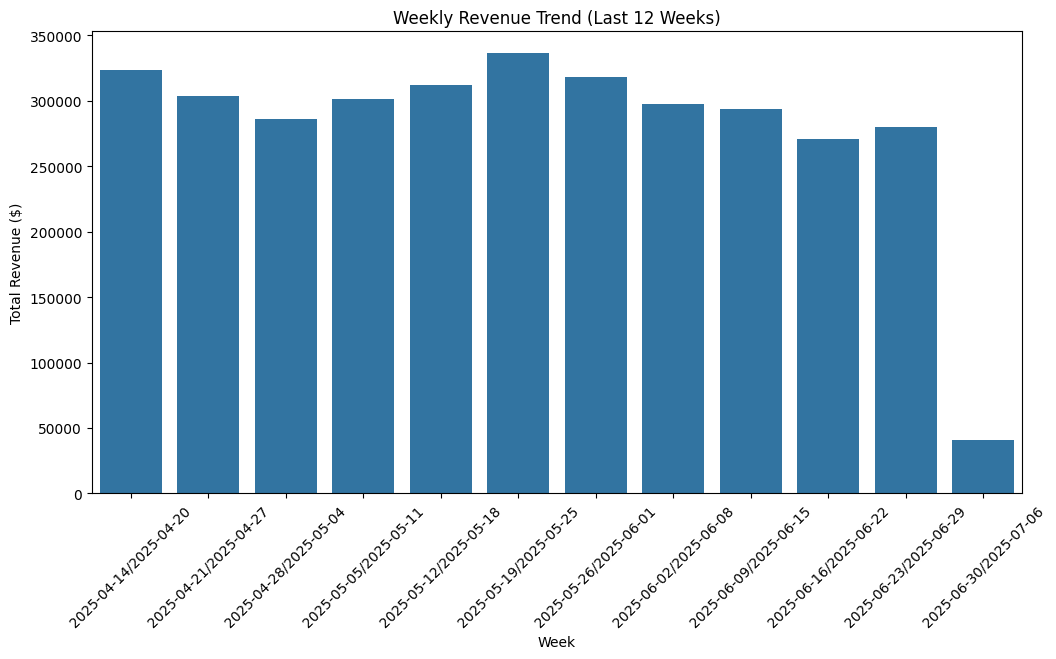

In [ ]:
# Weekly revenue trend (last 12 weeks example)
weekly_revenue = df.groupby('week')['revenue'].sum().reset_index().tail(12)
plt.figure(figsize=(12, 6))
sns.barplot(data=weekly_revenue, x='week', y='revenue')
plt.title('Weekly Revenue Trend (Last 12 Weeks)')
plt.xlabel('Week')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Which categories/brands drive most revenue?

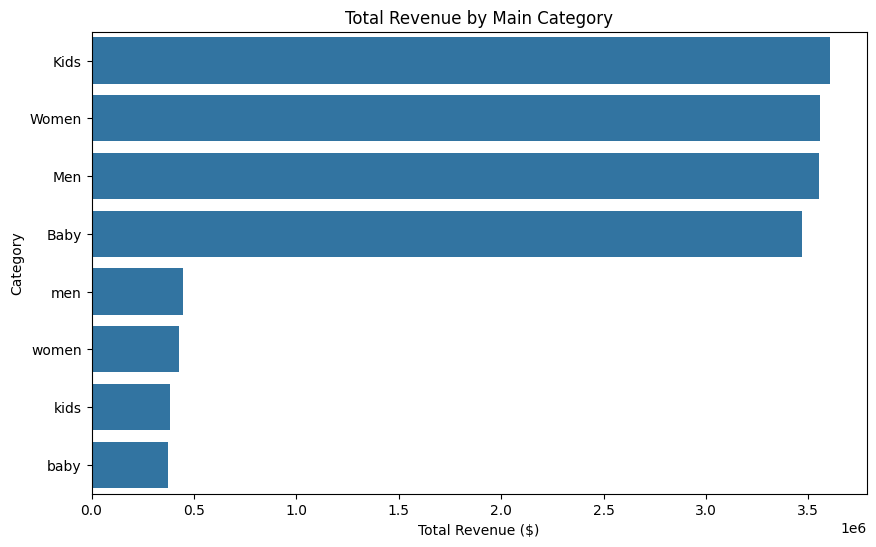

In [ ]:
# By main category
category_revenue = df.groupby('main_category')['revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_revenue.values, y=category_revenue.index)
plt.title('Total Revenue by Main Category')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Category')
plt.show()

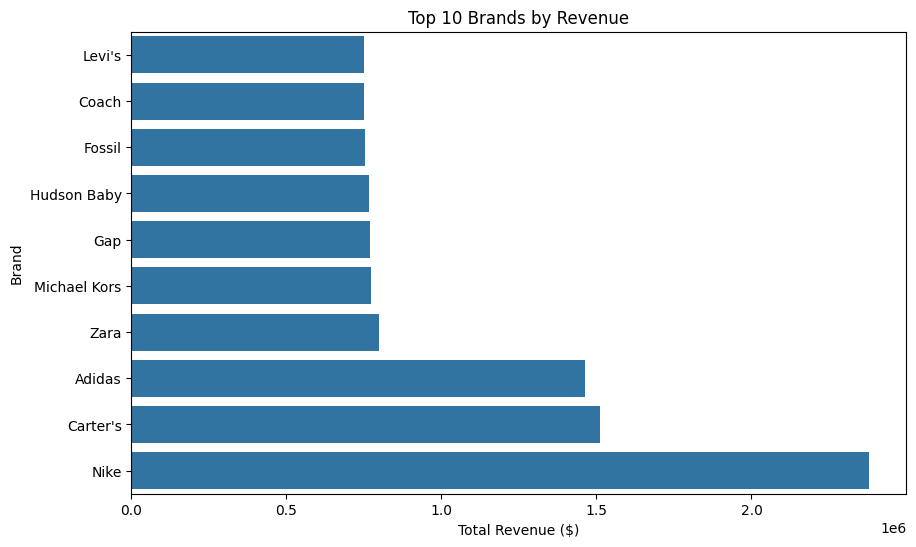

In [ ]:
# Top 10 brands by revenue
brand_revenue = df.groupby('brand')['revenue'].sum().nlargest(10).sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_revenue.values, y=brand_revenue.index)
plt.title('Top 10 Brands by Revenue')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Brand')
plt.show()

In [ ]:
#Price vs quantity sold (does higher price suppress quantity?).

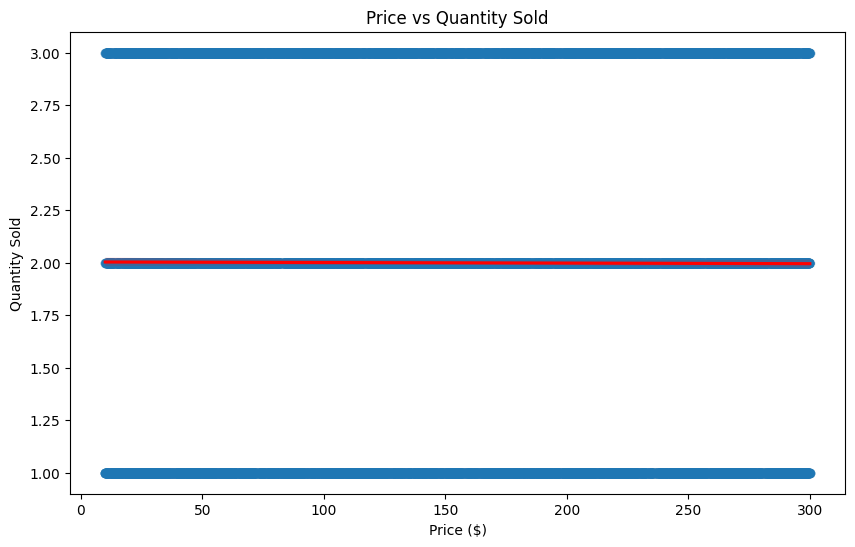

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='price', y='quantity', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Price vs Quantity Sold')
plt.xlabel('Price ($)')
plt.ylabel('Quantity Sold')
plt.show()

In [ ]:
# Correlation coefficient
price_quantity_corr = df[['price', 'quantity']].corr().iloc[0,1]
print(f"Correlation between price and quantity sold: {price_quantity_corr:.2f}")

Correlation between price and quantity sold: -0.00


In [ ]:
#2.Discount Effectiveness:

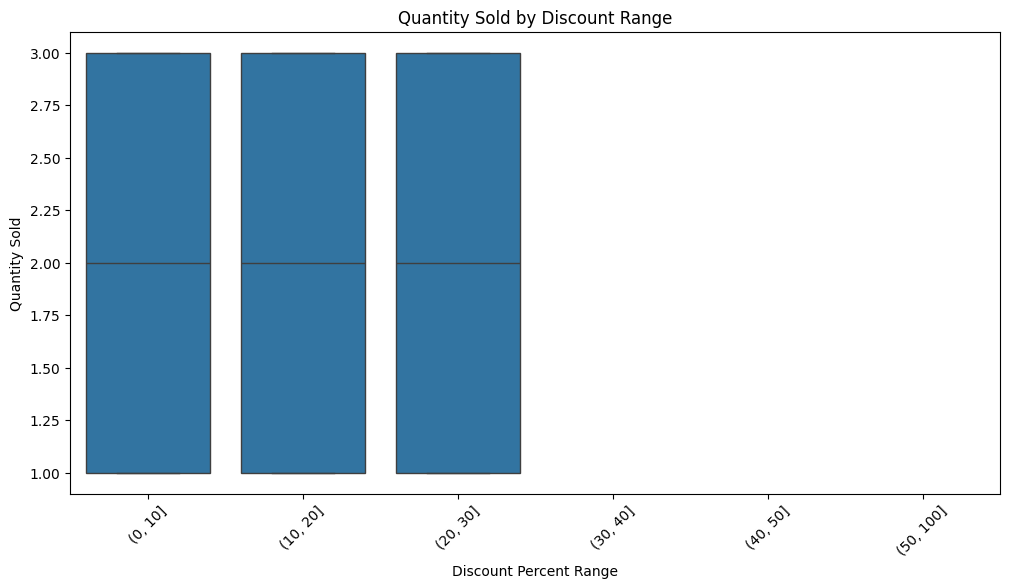

In [ ]:
# Discount percent vs quantity sold
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=pd.cut(df['discount_percent'], bins=[0, 10, 20, 30, 40, 50, 100]), y='quantity')
plt.title('Quantity Sold by Discount Range')
plt.xlabel('Discount Percent Range')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1720163279.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_revenue = df.groupby(pd.cut(df['discount_percent'], bins=5))['revenue'].sum()


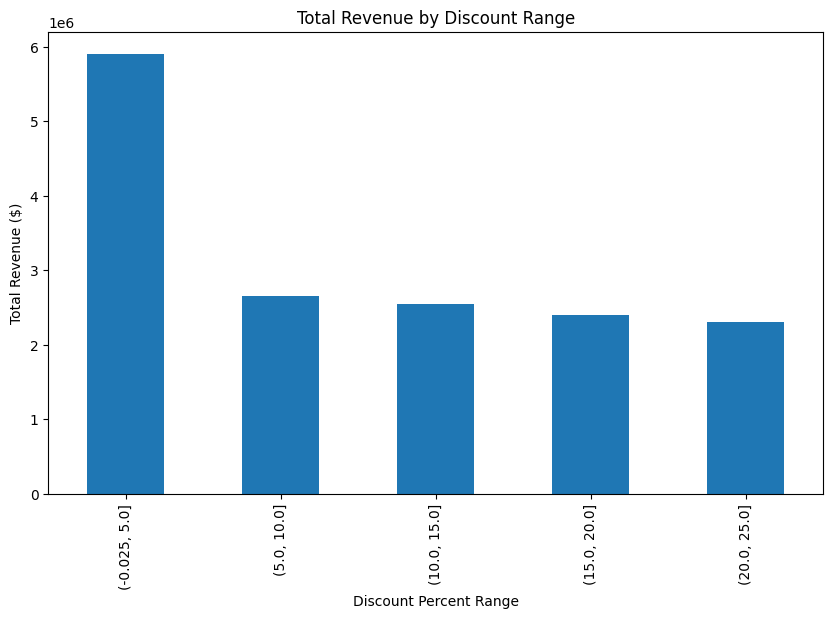

In [ ]:
# Discount impact on revenue
discount_revenue = df.groupby(pd.cut(df['discount_percent'], bins=5))['revenue'].sum()
discount_revenue.plot(kind='bar', figsize=(10, 6))
plt.title('Total Revenue by Discount Range')
plt.xlabel('Discount Percent Range')
plt.ylabel('Total Revenue ($)')
plt.show()

In [ ]:
#3.	Returns Analysis:

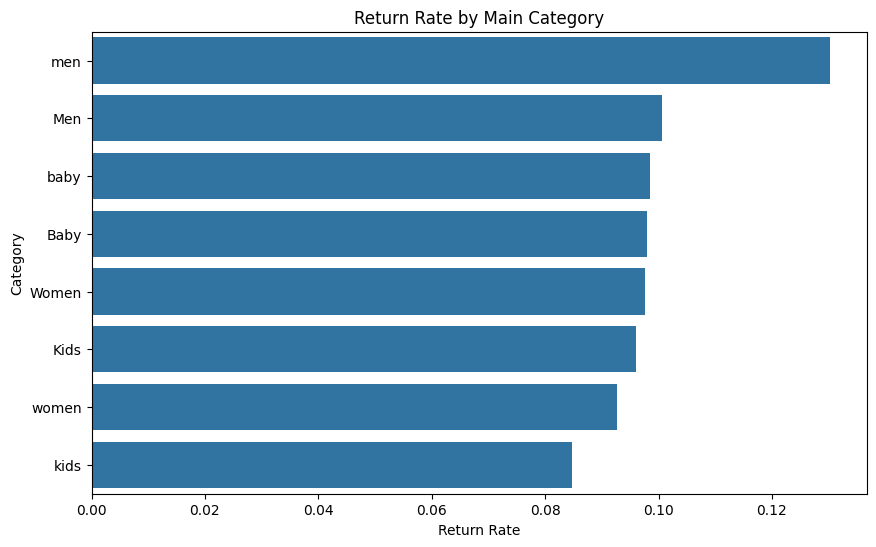

In [ ]:
# Return rate by category
return_rate_category = df.groupby('main_category')['is_returned'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=return_rate_category.values, y=return_rate_category.index)
plt.title('Return Rate by Main Category')
plt.xlabel('Return Rate')
plt.ylabel('Category')
plt.show()

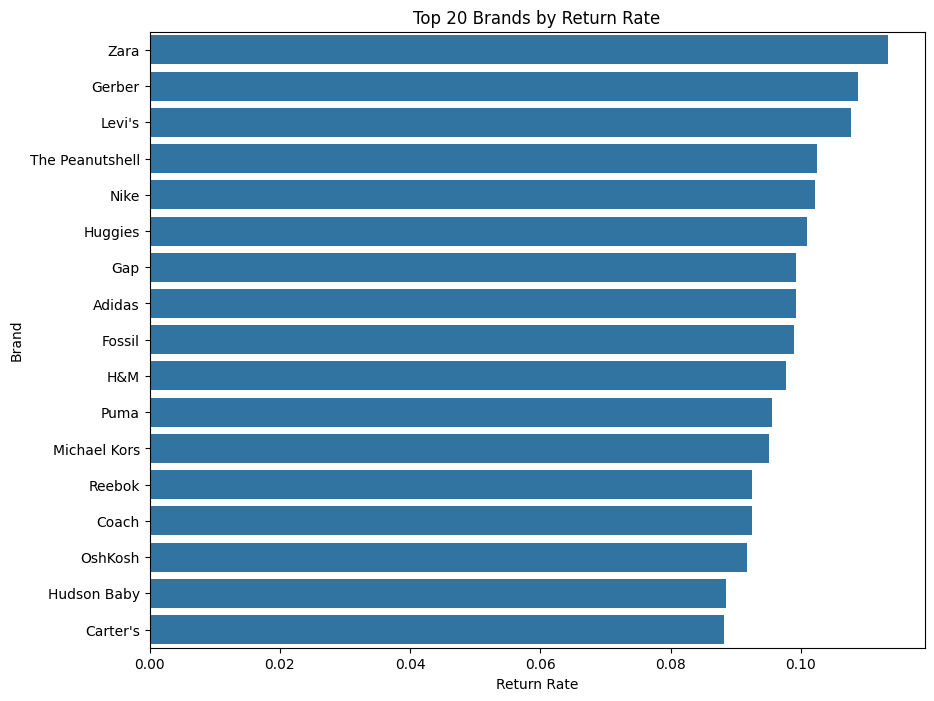

In [ ]:
# Return rate by brand (top 20)
return_rate_brand = df.groupby('brand')['is_returned'].mean().nlargest(20)
plt.figure(figsize=(10, 8))
sns.barplot(x=return_rate_brand.values, y=return_rate_brand.index)
plt.title('Top 20 Brands by Return Rate')
plt.xlabel('Return Rate')
plt.ylabel('Brand')
plt.show()

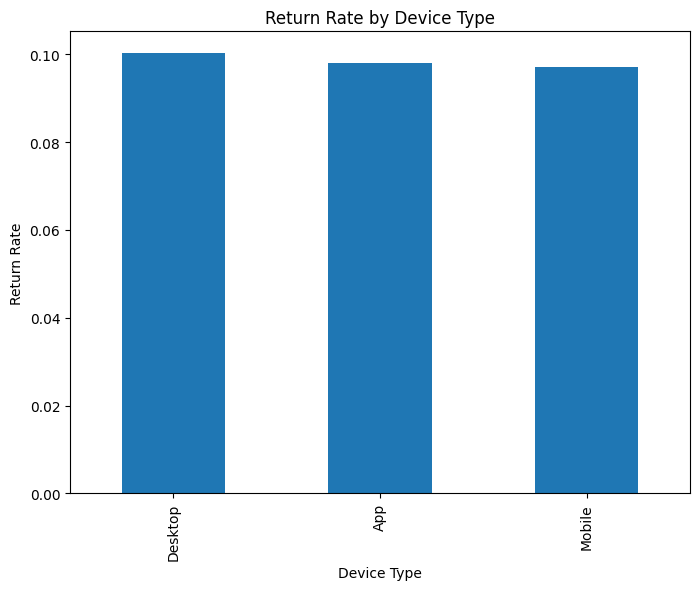

In [ ]:
# Return rate by device type
return_rate_device = df.groupby('device_type')['is_returned'].mean().sort_values(ascending=False)
return_rate_device.plot(kind='bar', figsize=(8, 6))
plt.title('Return Rate by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Return Rate')
plt.show()

In [ ]:
#4.	Customer Behavior:

In [ ]:
# Calculate customer value metrics
customer_stats = df.groupby('customer_id').agg(
    total_orders=('order_id', 'nunique'),
    total_revenue=('revenue', 'sum'),
    avg_order_value=('final_price', 'mean')
).reset_index()

In [ ]:
# Segment customers
customer_stats['segment'] = pd.cut(customer_stats['total_orders'],
                                  bins=[0, 1, 3, 10, float('inf')],
                                  labels=['One-time', 'Occasional', 'Regular', 'Frequent'])

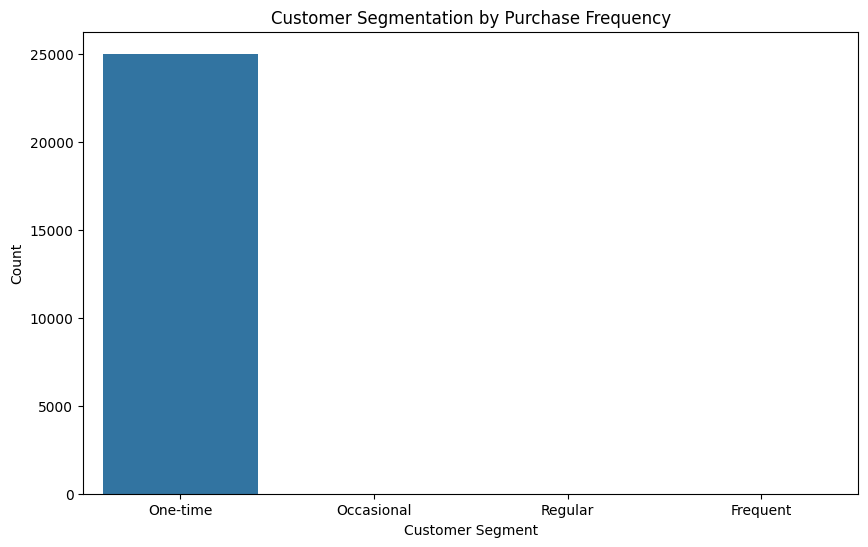

In [ ]:
# Visualize segments
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_stats, x='segment', order=['One-time', 'Occasional', 'Regular', 'Frequent'])
plt.title('Customer Segmentation by Purchase Frequency')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.show()

In [ ]:
#	Average order value (AOV) by region / age group.

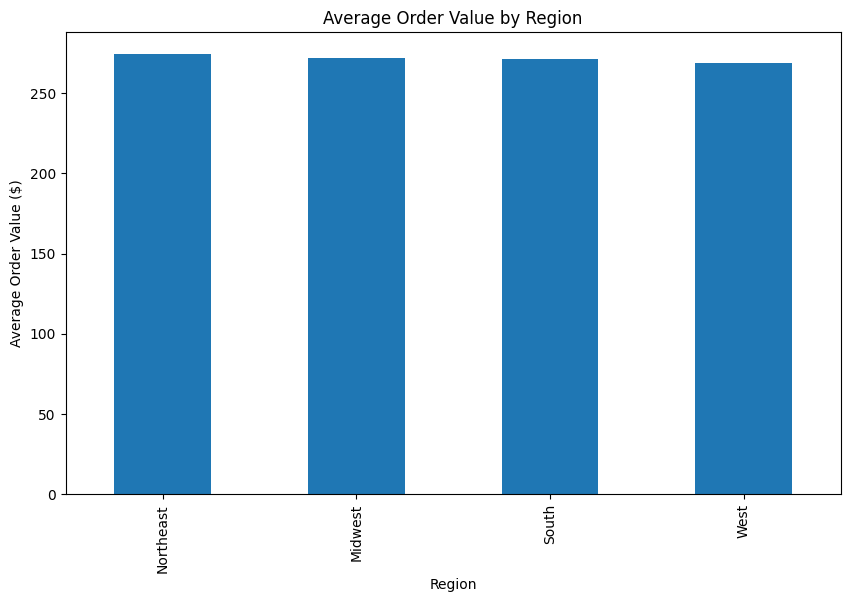

In [ ]:
# AOV by region
aov_region = df.groupby('region')['final_price'].mean().sort_values(ascending=False)
aov_region.plot(kind='bar', figsize=(10, 6))
plt.title('Average Order Value by Region')
plt.xlabel('Region')
plt.ylabel('Average Order Value ($)')
plt.show()

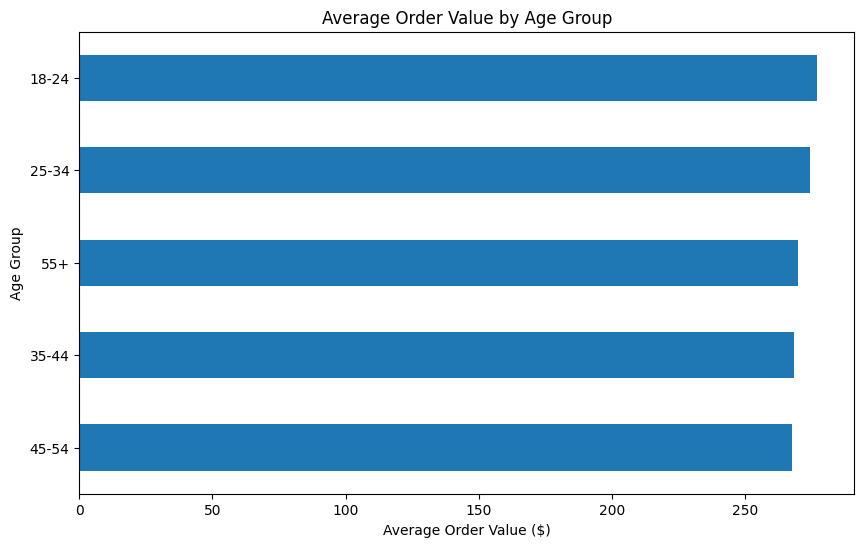

In [ ]:
# AOV by age group
aov_age = df.groupby('customer_age_group')['final_price'].mean().sort_values()
aov_age.plot(kind='barh', figsize=(10, 6))
plt.title('Average Order Value by Age Group')
plt.xlabel('Average Order Value ($)')
plt.ylabel('Age Group')
plt.show()

In [ ]:
#	Delivery days distribution and its effect on review rating / return probability.

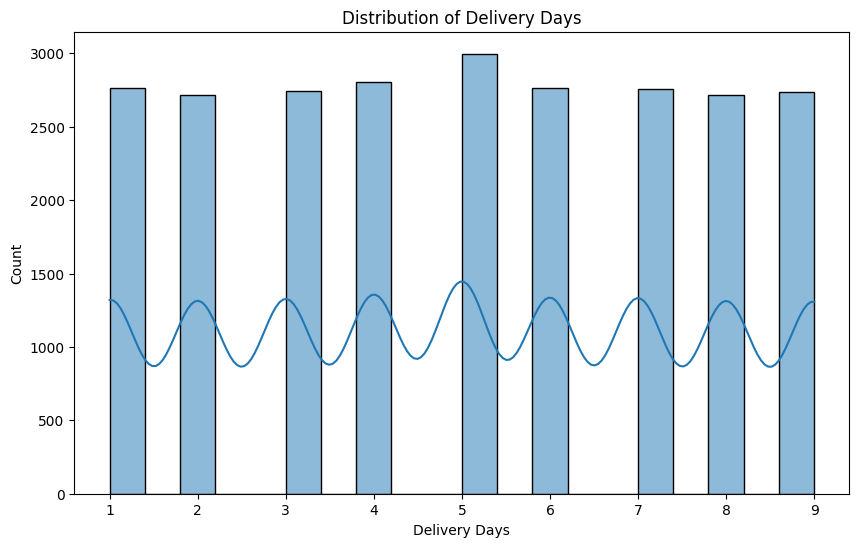

In [ ]:
# Delivery days distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='delivery_days', bins=20, kde=True)
plt.title('Distribution of Delivery Days')
plt.xlabel('Delivery Days')
plt.ylabel('Count')
plt.show()

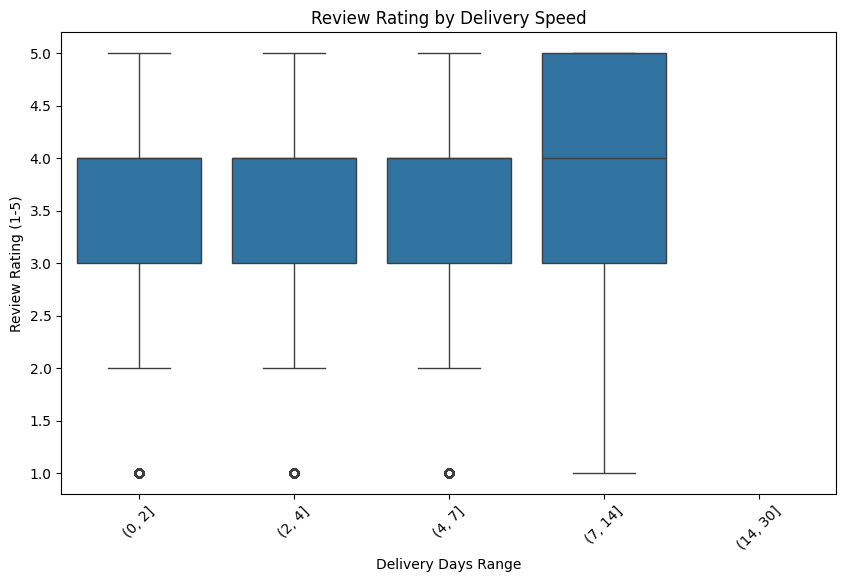

In [ ]:
# Delivery days vs review rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=pd.cut(df['delivery_days'], bins=[0, 2, 4, 7, 14, 30]), y='review_rating')
plt.title('Review Rating by Delivery Speed')
plt.xlabel('Delivery Days Range')
plt.ylabel('Review Rating (1-5)')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-777731720.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_return = df.groupby(pd.cut(df['delivery_days'], bins=[0, 3, 7, 14, 30]))['is_returned'].mean()


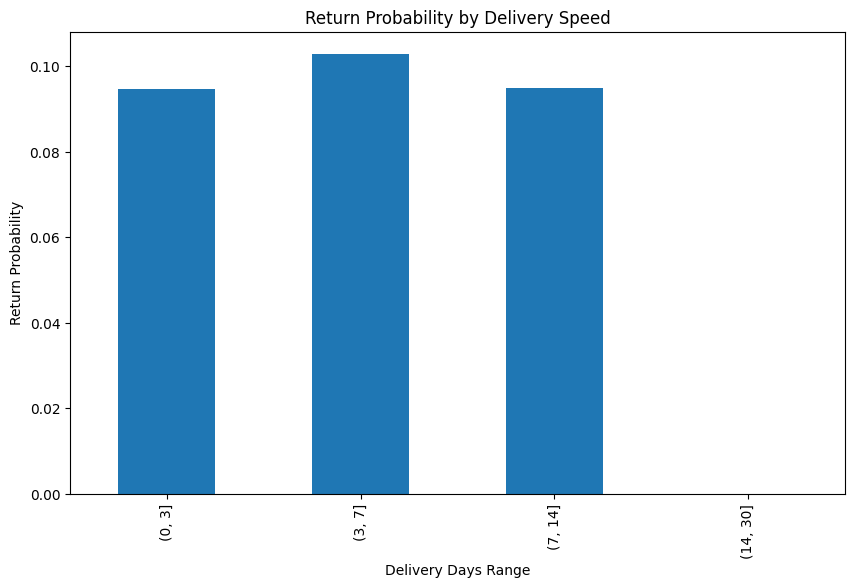

In [ ]:
# Delivery days vs return probability
delivery_return = df.groupby(pd.cut(df['delivery_days'], bins=[0, 3, 7, 14, 30]))['is_returned'].mean()
delivery_return.plot(kind='bar', figsize=(10, 6))
plt.title('Return Probability by Delivery Speed')
plt.xlabel('Delivery Days Range')
plt.ylabel('Return Probability')
plt.show()

In [ ]:
#5.Rating Signal:

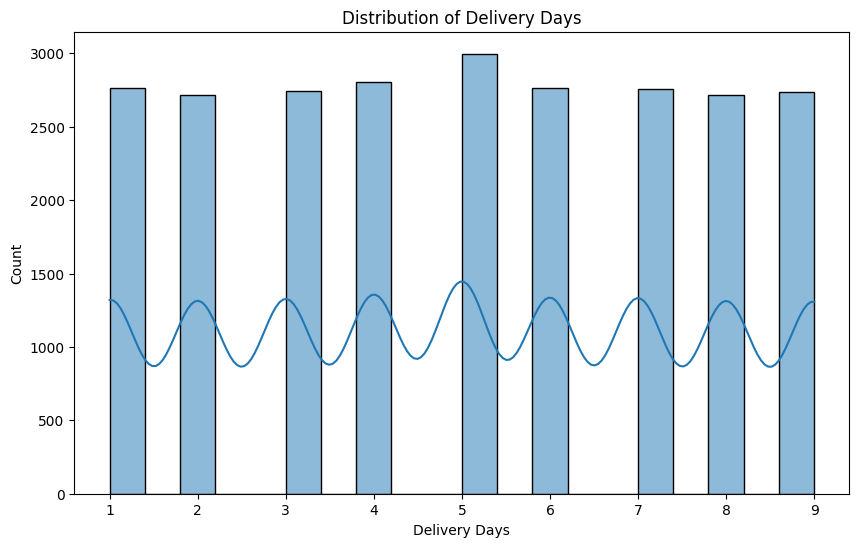

In [ ]:
# Delivery days distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='delivery_days', bins=20, kde=True)
plt.title('Distribution of Delivery Days')
plt.xlabel('Delivery Days')
plt.ylabel('Count')
plt.show()

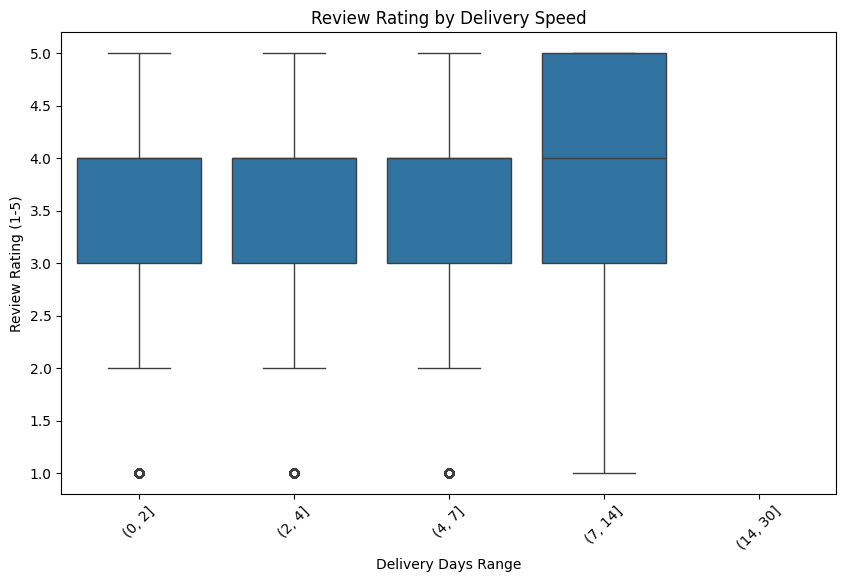

In [ ]:
# Delivery days vs review rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=pd.cut(df['delivery_days'], bins=[0, 2, 4, 7, 14, 30]), y='review_rating')
plt.title('Review Rating by Delivery Speed')
plt.xlabel('Delivery Days Range')
plt.ylabel('Review Rating (1-5)')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-777731720.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_return = df.groupby(pd.cut(df['delivery_days'], bins=[0, 3, 7, 14, 30]))['is_returned'].mean()


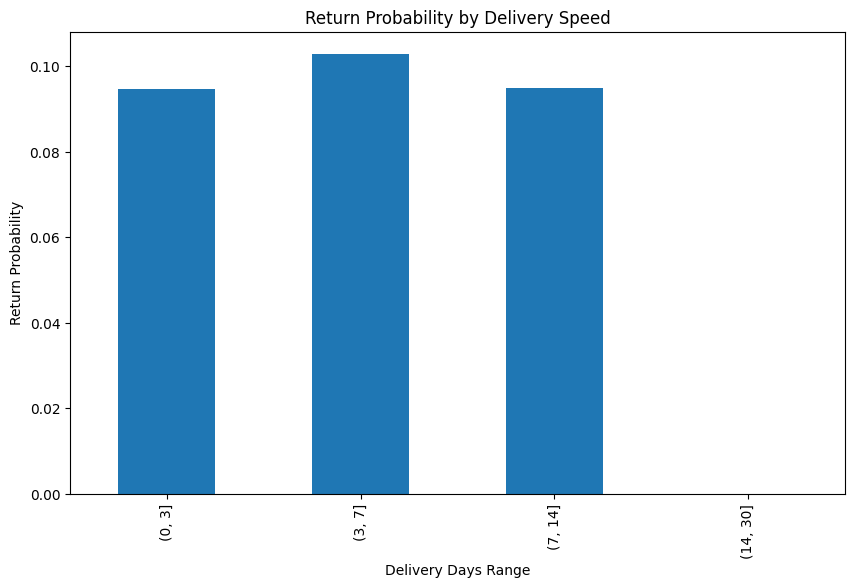

In [ ]:
# Delivery days vs return probability
delivery_return = df.groupby(pd.cut(df['delivery_days'], bins=[0, 3, 7, 14, 30]))['is_returned'].mean()
delivery_return.plot(kind='bar', figsize=(10, 6))
plt.title('Return Probability by Delivery Speed')
plt.xlabel('Delivery Days Range')
plt.ylabel('Return Probability')
plt.show()

In [ ]:
#Correlate low ratings with subsequent returns.

/tmp/ipython-input-2541996914.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_rating.values, y=brand_rating.index, palette='viridis')


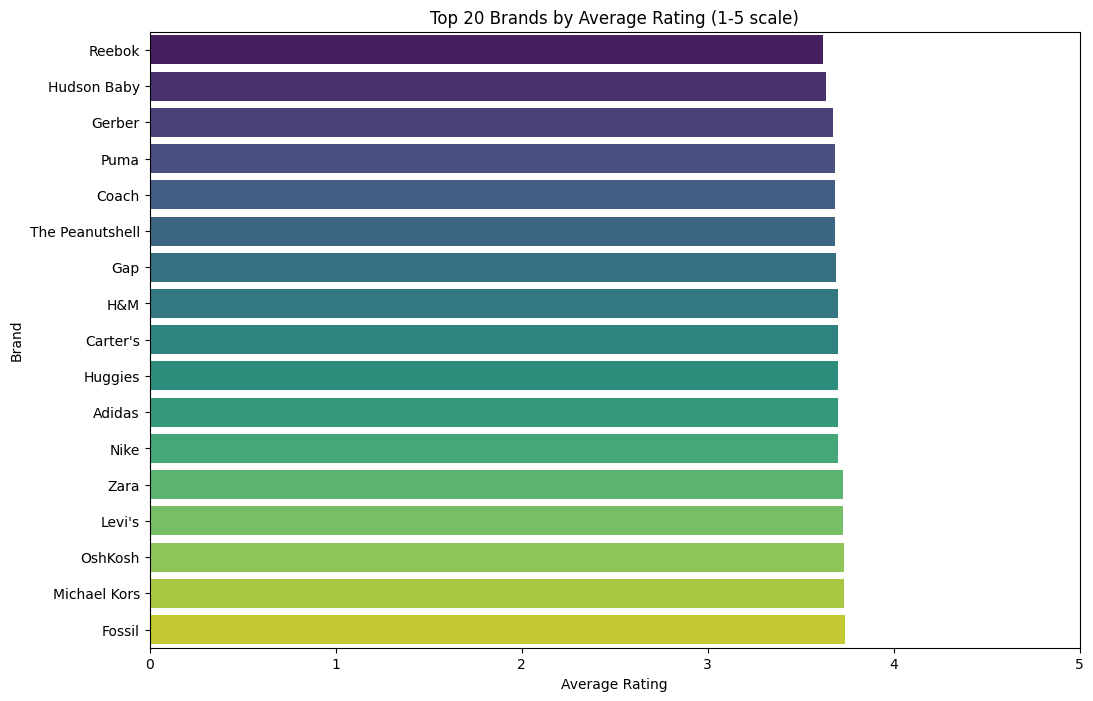

In [ ]:
# Average rating by brand (top 20 brands)
plt.figure(figsize=(12, 8))
brand_rating = df.groupby('brand')['review_rating'].mean().nlargest(20).sort_values()
sns.barplot(x=brand_rating.values, y=brand_rating.index, palette='viridis')
plt.title('Top 20 Brands by Average Rating (1-5 scale)')
plt.xlabel('Average Rating')
plt.ylabel('Brand')
plt.xlim(0, 5)
plt.show()

/tmp/ipython-input-756886091.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_rating.values, y=category_rating.index, palette='coolwarm')


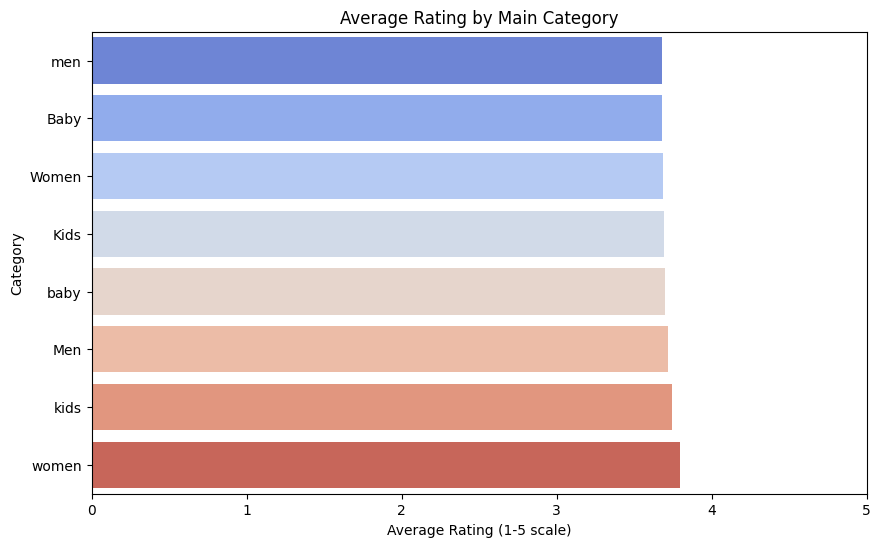

In [ ]:
# Average rating by main category
plt.figure(figsize=(10, 6))
category_rating = df.groupby('main_category')['review_rating'].mean().sort_values()
sns.barplot(x=category_rating.values, y=category_rating.index, palette='coolwarm')
plt.title('Average Rating by Main Category')
plt.xlabel('Average Rating (1-5 scale)')
plt.ylabel('Category')
plt.xlim(0, 5)
plt.show()

/tmp/ipython-input-3480624200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_rating.values, y=region_rating.index, palette='plasma')


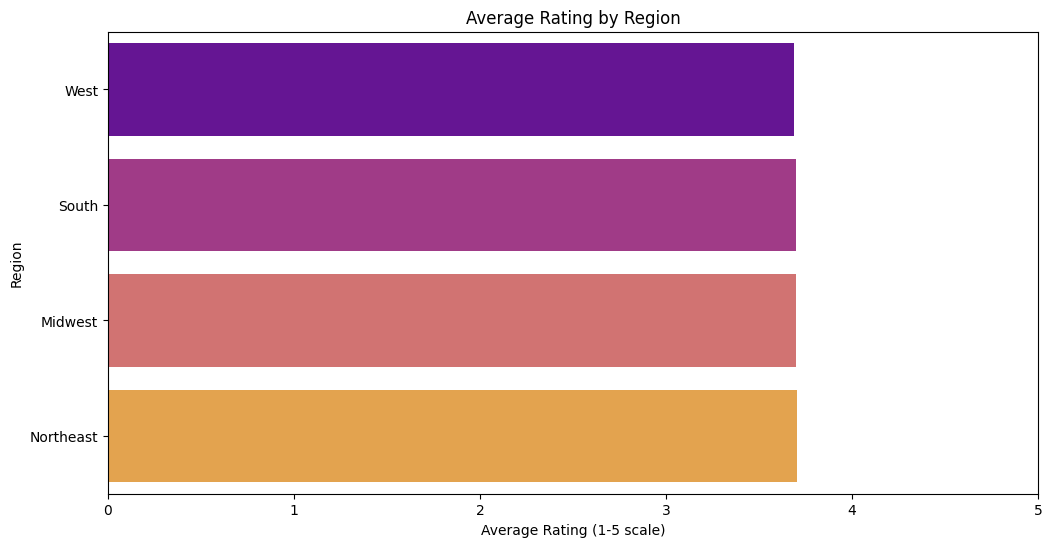

In [ ]:
# Average rating by region
plt.figure(figsize=(12, 6))
region_rating = df.groupby('region')['review_rating'].mean().sort_values()
sns.barplot(x=region_rating.values, y=region_rating.index, palette='plasma')
plt.title('Average Rating by Region')
plt.xlabel('Average Rating (1-5 scale)')
plt.ylabel('Region')
plt.xlim(0, 5)
plt.show()

/tmp/ipython-input-3879498198.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_return.values, y=payment_return.index, palette='rocket')


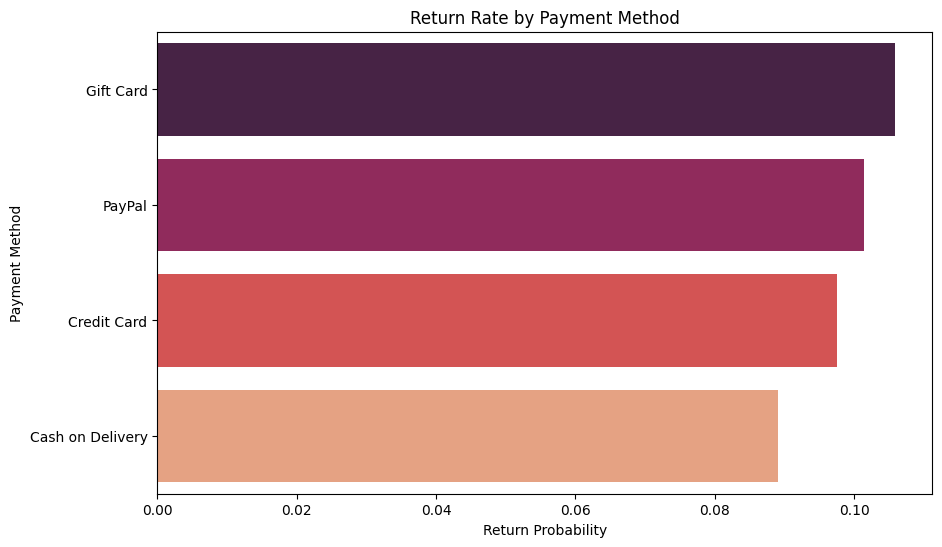

In [ ]:
# Return rate by payment method
plt.figure(figsize=(10, 6))
payment_return = df.groupby('payment_method')['is_returned'].mean().sort_values(ascending=False)
sns.barplot(x=payment_return.values, y=payment_return.index, palette='rocket')
plt.title('Return Rate by Payment Method')
plt.xlabel('Return Probability')
plt.ylabel('Payment Method')
plt.show()

In [ ]:
# Statistical test
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['payment_method'], df['is_returned'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test p-value: {p:.4f}")

Chi-square test p-value: 0.0166


/tmp/ipython-input-601715004.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_aov.values, y=payment_aov.index, palette='mako')


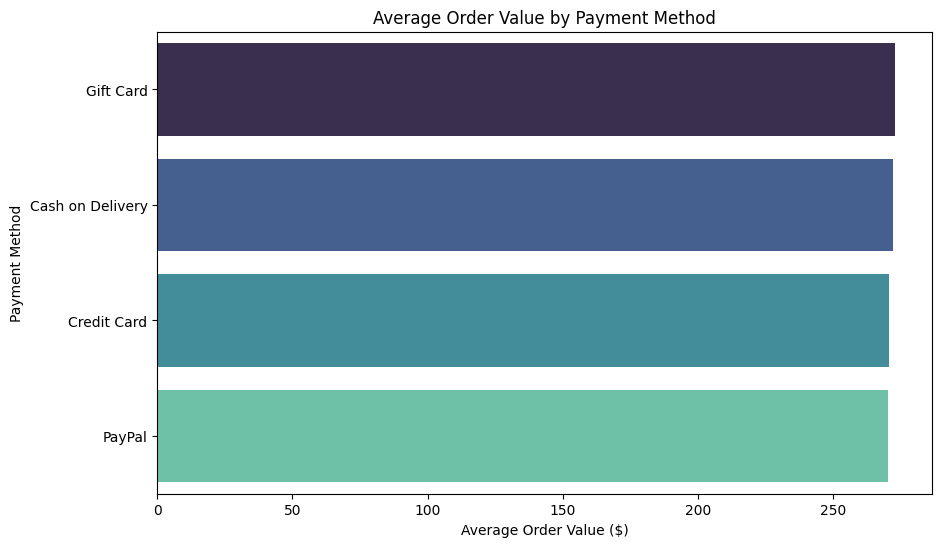

In [ ]:
# Average order value by payment method
plt.figure(figsize=(10, 6))
payment_aov = df.groupby('payment_method')['final_price'].mean().sort_values(ascending=False)
sns.barplot(x=payment_aov.values, y=payment_aov.index, palette='mako')
plt.title('Average Order Value by Payment Method')
plt.xlabel('Average Order Value ($)')
plt.ylabel('Payment Method')
plt.show()

In [ ]:
# ANOVA test
from scipy.stats import f_oneway
groups = [group['final_price'].values for name, group in df.groupby('payment_method')]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA p-value: {p_value:.4f}")

ANOVA p-value: 0.8354


In [ ]:
#7.	Cross-analysis:

/tmp/ipython-input-1652336363.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_return.values, y=device_return.index, palette='flare')


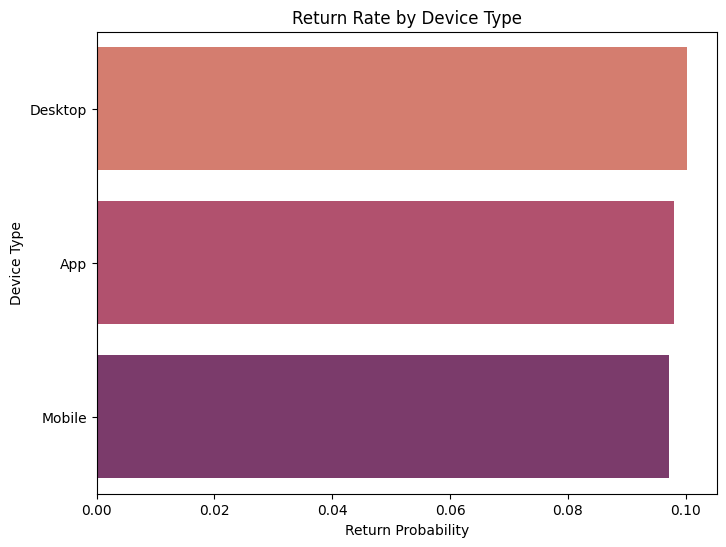

In [ ]:
# Device type analysis
plt.figure(figsize=(8, 6))
device_return = df.groupby('device_type')['is_returned'].mean().sort_values(ascending=False)
sns.barplot(x=device_return.values, y=device_return.index, palette='flare')
plt.title('Return Rate by Device Type')
plt.xlabel('Return Probability')
plt.ylabel('Device Type')
plt.show()

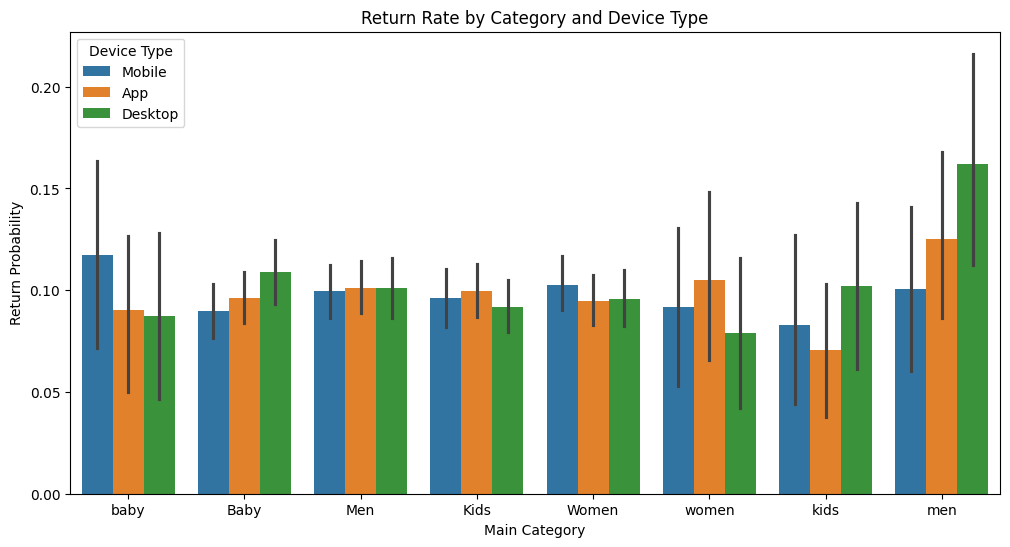

In [ ]:
# Add category breakdown
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='main_category', y='is_returned', hue='device_type')
plt.title('Return Rate by Category and Device Type')
plt.xlabel('Main Category')
plt.ylabel('Return Probability')
plt.legend(title='Device Type')
plt.show()

In [ ]:
#Region vs Delivery Performance

/tmp/ipython-input-3135700127.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='region', y='delivery_days', showfliers=False, palette='viridis')


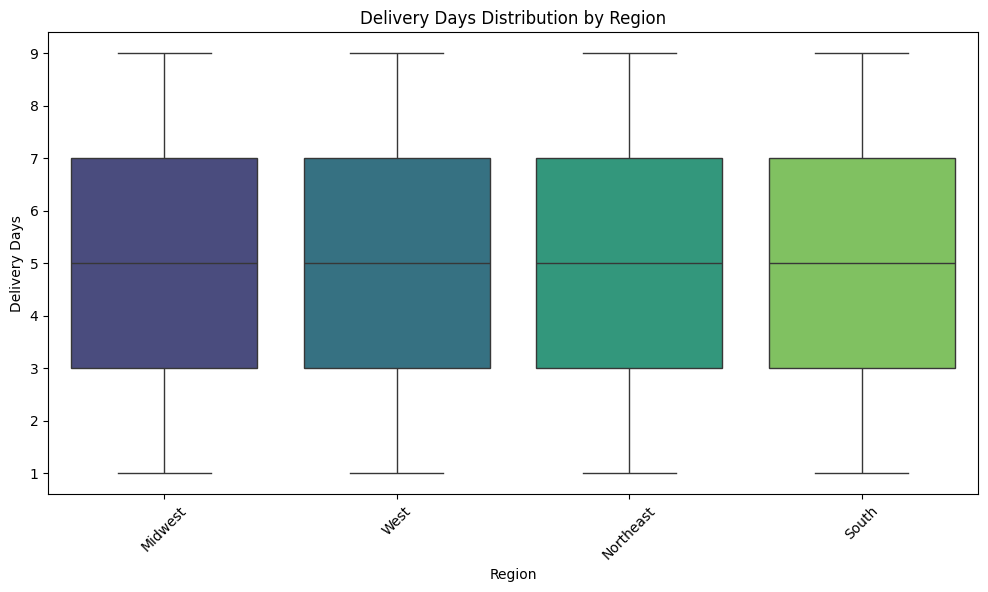

In [ ]:
# Delivery performance by region
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='region', y='delivery_days', showfliers=False, palette='viridis')
plt.title('Delivery Days Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Delivery Days')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3279729817.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_performance.values, y=region_performance.index, palette='viridis')


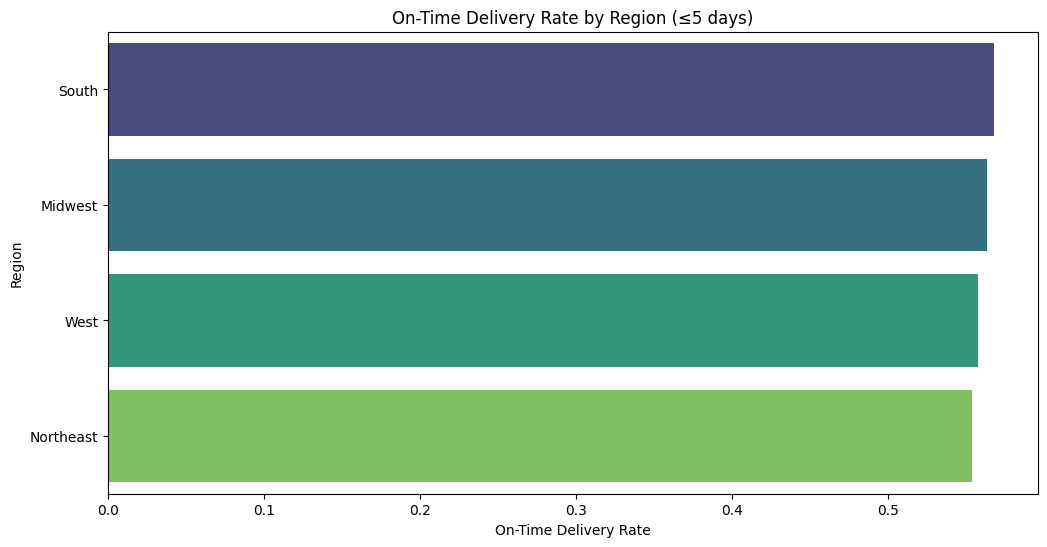

In [ ]:
# Calculate on-time delivery rates (assuming <= 5 days is on-time)
df['on_time'] = df['delivery_days'] <= 5
region_performance = df.groupby('region')['on_time'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=region_performance.values, y=region_performance.index, palette='viridis')
plt.title('On-Time Delivery Rate by Region (≤5 days)')
plt.xlabel('On-Time Delivery Rate')
plt.ylabel('Region')
plt.show()

In [ ]:
#Age Group vs Discount Sensitivity

/tmp/ipython-input-4274170122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='customer_age_group', y='discount_percent', showfliers=False, palette='coolwarm')


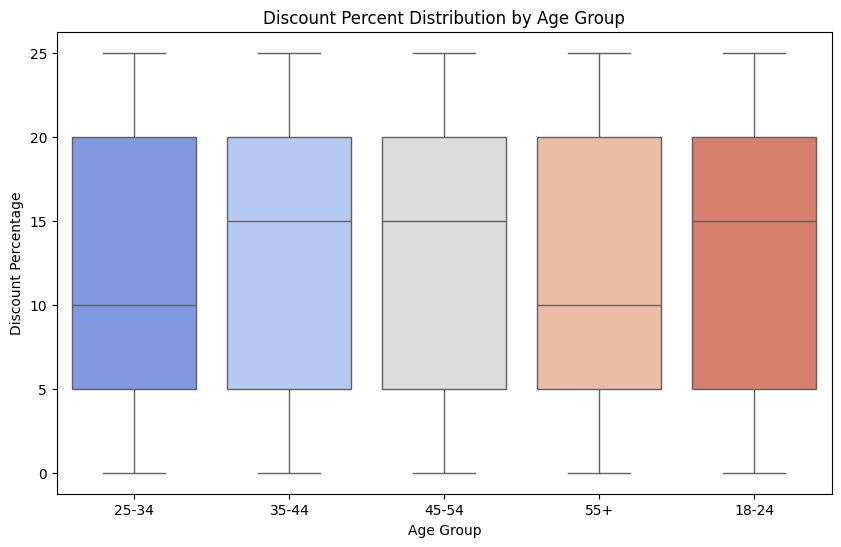

In [ ]:
# Discount usage by age group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='customer_age_group', y='discount_percent', showfliers=False, palette='coolwarm')
plt.title('Discount Percent Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Discount Percentage')
plt.show()

<Figure size 1200x600 with 0 Axes>

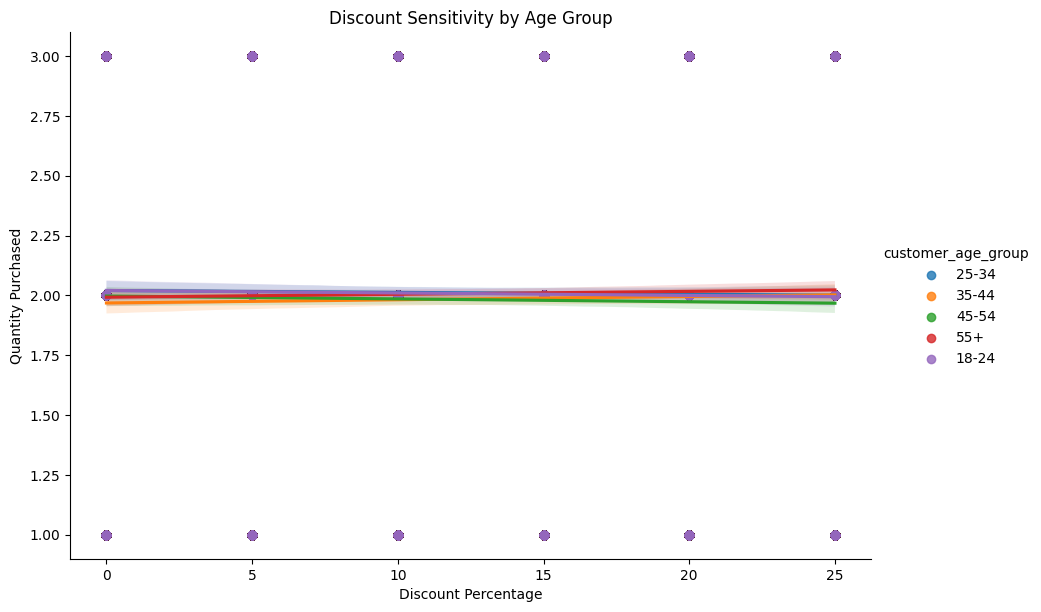

In [ ]:
# Purchase quantity response to discounts by age
plt.figure(figsize=(12, 6))
sns.lmplot(data=df, x='discount_percent', y='quantity',
           hue='customer_age_group', height=6, aspect=1.5)
plt.title('Discount Sensitivity by Age Group')
plt.xlabel('Discount Percentage')
plt.ylabel('Quantity Purchased')
plt.show()

In [ ]:
#D.Hypothesis Ideas

Text(0, 0.5, 'Quantity Sold')

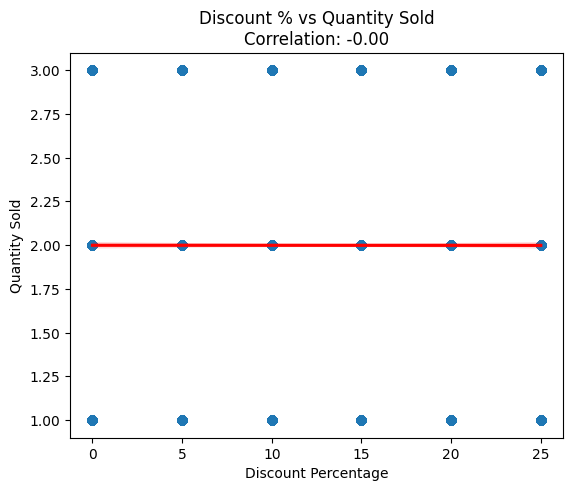

In [ ]:
# Hypothesis 1 Analysis
plt.figure(figsize=(14, 5))

# Part 1: Discount vs Quantity
plt.subplot(1, 2, 1)
sns.regplot(data=df, x='discount_percent', y='quantity',
           scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.title('Discount % vs Quantity Sold\nCorrelation: {:.2f}'.format(
    df[['discount_percent', 'quantity']].corr().iloc[0,1]))
plt.xlabel('Discount Percentage')
plt.ylabel('Quantity Sold')



/tmp/ipython-input-3841430319.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='discount_tier', y='is_returned', ci=None)


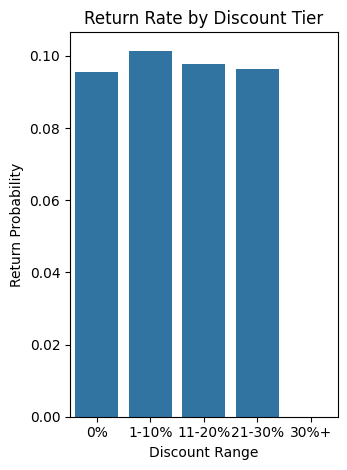

Discount vs Quantity: r=-0.000, p=0.9659
Return rate by discount tier: F=nan, p=nan


/tmp/ipython-input-3841430319.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['is_returned'].values for name, group in df.groupby('discount_tier')]
/tmp/ipython-input-3841430319.py:23: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, return_p = f_oneway(*groups)


In [ ]:
# Part 2: Discount vs Returns
plt.subplot(1, 2, 2)
df['discount_tier'] = pd.cut(df['discount_percent'],
                           bins=[-1, 0, 10, 20, 30, 100],
                           labels=['0%', '1-10%', '11-20%', '21-30%', '30%+'])
sns.barplot(data=df, x='discount_tier', y='is_returned', ci=None)
plt.title('Return Rate by Discount Tier')
plt.xlabel('Discount Range')
plt.ylabel('Return Probability')

plt.tight_layout()
plt.show()

# Statistical tests
from scipy.stats import pearsonr, f_oneway

# Discount vs Quantity correlation
disc_qty_corr, disc_qty_p = pearsonr(df['discount_percent'], df['quantity'])
print(f"Discount vs Quantity: r={disc_qty_corr:.3f}, p={disc_qty_p:.4f}")

# Discount vs Returns ANOVA
groups = [group['is_returned'].values for name, group in df.groupby('discount_tier')]
f_stat, return_p = f_oneway(*groups)
print(f"Return rate by discount tier: F={f_stat:.2f}, p={return_p:.4f}")

In [ ]:
#2.Longer delivery times negatively impact review ratings and increase returns.

Text(0, 0.5, 'Review Rating (1-5)')

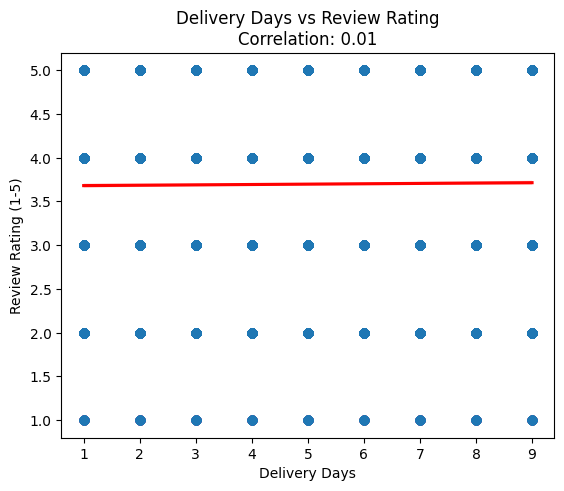

In [ ]:
# Hypothesis 2 Analysis
plt.figure(figsize=(14, 5))

# Part 1: Delivery days vs Rating
plt.subplot(1, 2, 1)
sns.regplot(data=df, x='delivery_days', y='review_rating',
           scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.title('Delivery Days vs Review Rating\nCorrelation: {:.2f}'.format(
    df[['delivery_days', 'review_rating']].corr().iloc[0,1]))
plt.xlabel('Delivery Days')
plt.ylabel('Review Rating (1-5)')

/tmp/ipython-input-508919330.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='delivery_speed', y='is_returned', ci=None)


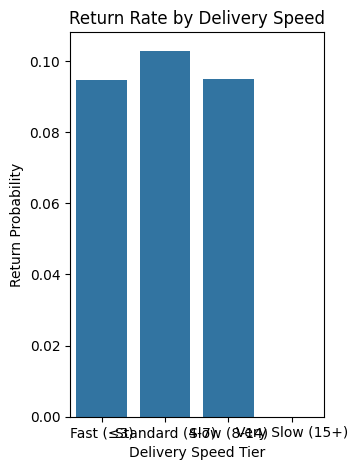

Delivery days vs Rating: r=0.010, p=0.1212
Return rate by delivery speed: F=nan, p=nan


/tmp/ipython-input-508919330.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['is_returned'].values for name, group in df.groupby('delivery_speed')]
/tmp/ipython-input-508919330.py:19: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, del_return_p = f_oneway(*groups)


In [ ]:
# Part 2: Delivery days vs Returns
plt.subplot(1, 2, 2)
df['delivery_speed'] = pd.cut(df['delivery_days'],
                            bins=[0, 3, 7, 14, float('inf')],
                            labels=['Fast (≤3)', 'Standard (4-7)', 'Slow (8-14)', 'Very Slow (15+)'])
sns.barplot(data=df, x='delivery_speed', y='is_returned', ci=None)
plt.title('Return Rate by Delivery Speed')
plt.xlabel('Delivery Speed Tier')
plt.ylabel('Return Probability')

plt.tight_layout()
plt.show()

# Statistical tests
del_rating_corr, del_rating_p = pearsonr(df['delivery_days'], df['review_rating'])
print(f"Delivery days vs Rating: r={del_rating_corr:.3f}, p={del_rating_p:.4f}")

groups = [group['is_returned'].values for name, group in df.groupby('delivery_speed')]
f_stat, del_return_p = f_oneway(*groups)
print(f"Return rate by delivery speed: F={f_stat:.2f}, p={del_return_p:.4f}")

In [ ]:
#3.	Certain age groups (e.g., 25–34) have higher average order values.

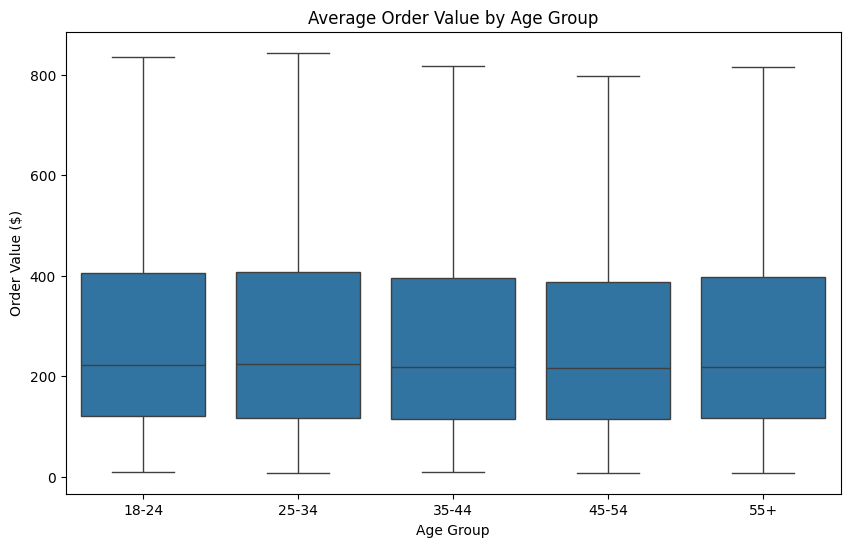

AOV by age group: F=2.15, p=0.0715
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 18-24  25-34  -2.8638  0.954 -13.8486   8.121  False
 18-24  35-44  -9.0043  0.172 -20.0662  2.0575  False
 18-24  45-54  -9.6567 0.1168 -20.6593  1.3458  False
 18-24    55+  -7.2816 0.3101 -17.6629  3.0997  False
 25-34  35-44  -6.1405 0.5492 -17.1586  4.8776  False
 25-34  45-54  -6.7929 0.4395 -17.7515  4.1657  False
 25-34    55+  -4.4178 0.7708 -14.7525  5.9169  False
 35-44  45-54  -0.6524 0.9998 -11.6882 10.3834  False
 35-44    55+   1.7227 0.9915  -8.6938 12.1392  False
 45-54    55+   2.3751  0.971  -7.9784 12.7287  False
-----------------------------------------------------


In [ ]:
# Hypothesis 3 Analysis
plt.figure(figsize=(10, 6))
age_order = df['customer_age_group'].unique()
sns.boxplot(data=df, x='customer_age_group', y='final_price',
           order=sorted(age_order), showfliers=False)
plt.title('Average Order Value by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Order Value ($)')
plt.show()

# ANOVA test
groups = [group['final_price'].values for name, group in df.groupby('customer_age_group')]
f_stat, aov_p = f_oneway(*groups)
print(f"AOV by age group: F={f_stat:.2f}, p={aov_p:.4f}")

# Post-hoc Tukey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['final_price'],
                         groups=df['customer_age_group'],
                         alpha=0.05)
print(tukey.summary())

In [ ]:
#4.	Customers ordering from specific regions have systematically different return behavior.

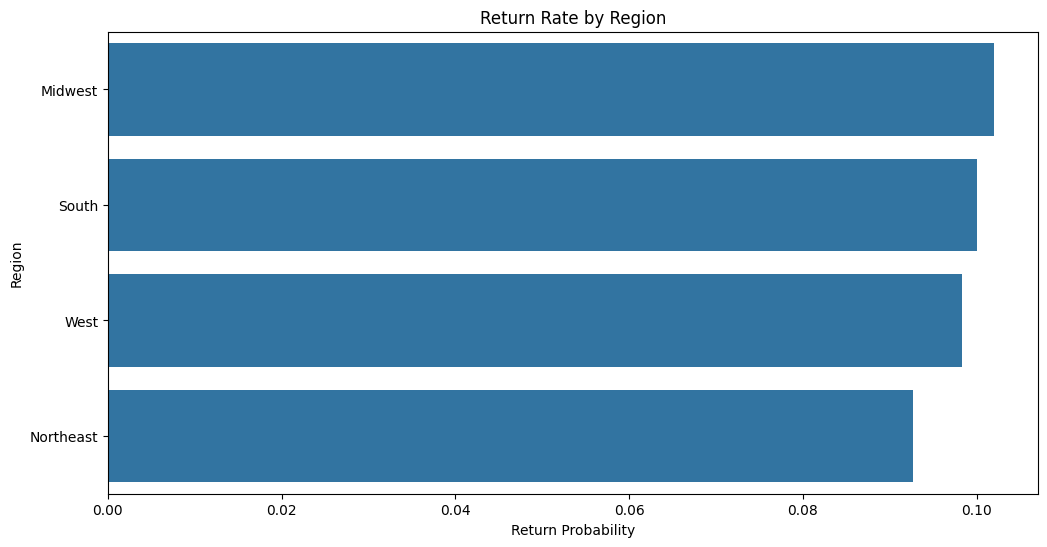

Regional return differences: χ²=3.34, p=0.3423

Standardized Residuals (>|2| indicates significant deviation):
is_returned         0         1
region                         
Midwest     -0.314346  0.951304
Northeast    0.462583 -1.399915
South       -0.125270  0.379103
West         0.012266 -0.037120


In [ ]:
# Hypothesis 4 Analysis
plt.figure(figsize=(12, 6))
return_by_region = df.groupby('region')['is_returned'].mean().sort_values(ascending=False)
sns.barplot(x=return_by_region.values, y=return_by_region.index)
plt.title('Return Rate by Region')
plt.xlabel('Return Probability')
plt.ylabel('Region')
plt.show()

# Chi-square test
contingency_table = pd.crosstab(df['region'], df['is_returned'])
chi2, region_p, dof, expected = chi2_contingency(contingency_table)
print(f"Regional return differences: χ²={chi2:.2f}, p={region_p:.4f}")

# Standardized residuals to identify over/under-performing regions
residuals = (contingency_table - expected) / np.sqrt(expected)
print("\nStandardized Residuals (>|2| indicates significant deviation):")
print(residuals)

In [ ]:
#5.	Mobile shoppers behave differently in terms of average spend or returns compared to desktop.

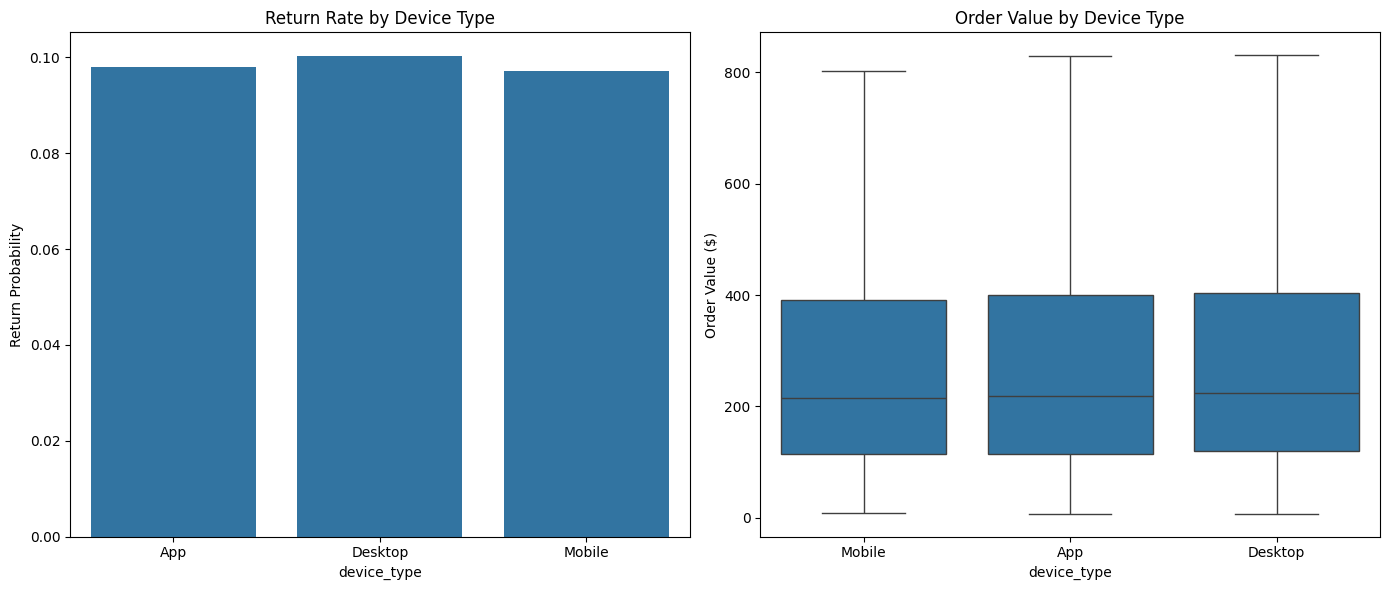

In [ ]:
# Hypothesis 5 Analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Return rate comparison
device_return = df.groupby('device_type')['is_returned'].mean()
sns.barplot(x=device_return.index, y=device_return.values, ax=ax1)
ax1.set_title('Return Rate by Device Type')
ax1.set_ylabel('Return Probability')

# AOV comparison
sns.boxplot(data=df, x='device_type', y='final_price', showfliers=False, ax=ax2)
ax2.set_title('Order Value by Device Type')
ax2.set_ylabel('Order Value ($)')

plt.tight_layout()
plt.show()



In [ ]:
# Statistical tests
from scipy.stats import ttest_ind

mobile = df[df['device_type'].str.contains('Mobile')]
desktop = df[df['device_type'].str.contains('Desktop')]

# Return rate test
t_stat_return, return_p = ttest_ind(mobile['is_returned'], desktop['is_returned'])
print(f"Mobile vs Desktop return rates: t={t_stat_return:.2f}, p={return_p:.4f}")

# AOV test
t_stat_aov, aov_p = ttest_ind(mobile['final_price'], desktop['final_price'])
print(f"Mobile vs Desktop AOV: t={t_stat_aov:.2f}, p={aov_p:.4f}")

Mobile vs Desktop return rates: t=-0.64, p=0.5204
Mobile vs Desktop AOV: t=-2.48, p=0.0133


In [ ]:
#E. Advanced Analyses

In [ ]:
#1.	Cohort Analysis: Group customers by their first purchase month and track retention (repeat orders) over time.

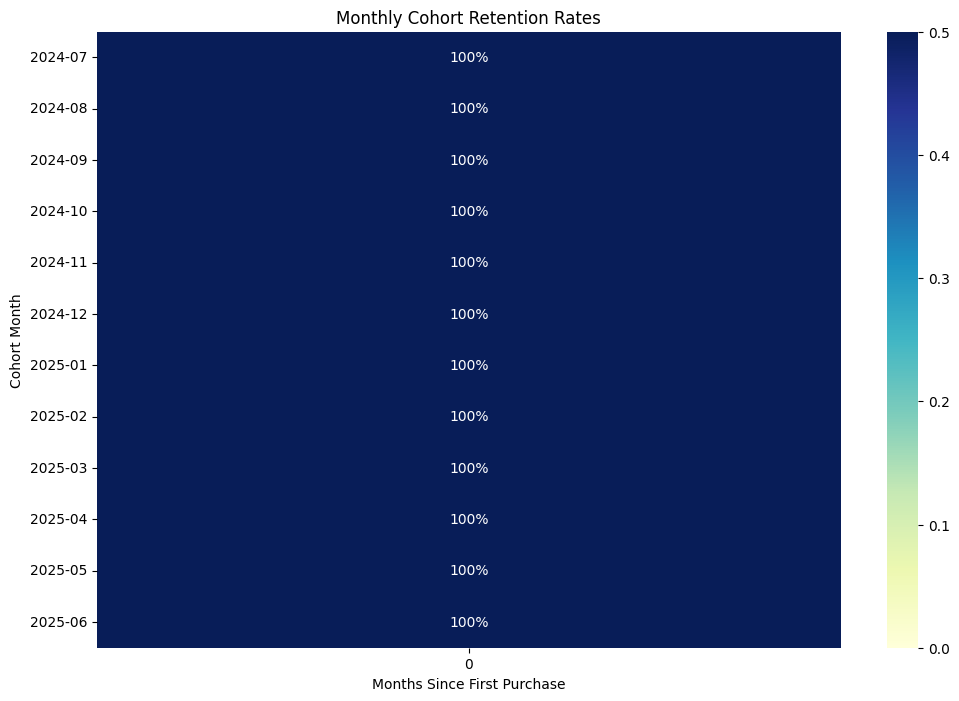

In [ ]:
# Create cohort analysis
def cohort_analysis(df):
    # Convert to datetime and extract month info
    df['order_date'] = pd.to_datetime(df['order_date'])
    df['order_month'] = df['order_date'].dt.to_period('M')

    # Create cohort groups by customer's first purchase
    df['cohort'] = df.groupby('customer_id')['order_date'].transform('min').dt.to_period('M')

    # Calculate cohort index (months since first purchase)
    df['cohort_index'] = (df['order_month'] - df['cohort']).apply(lambda x: x.n)

    # Create cohort matrix
    cohort_data = df.groupby(['cohort', 'cohort_index'])['customer_id'].nunique().unstack()

    # Calculate retention rates
    cohort_sizes = cohort_data.iloc[:, 0]
    retention_matrix = cohort_data.divide(cohort_sizes, axis=0)

    return retention_matrix

# Generate and visualize retention matrix
retention = cohort_analysis(df)
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu', vmin=0, vmax=0.5)
plt.title('Monthly Cohort Retention Rates')
plt.ylabel('Cohort Month')
plt.xlabel('Months Since First Purchase')
plt.show()

In [ ]:
#2.	Customer Segmentation: Cluster customers based on RFM (Recency, Frequency, Monetary) and behavior (returns, rating).

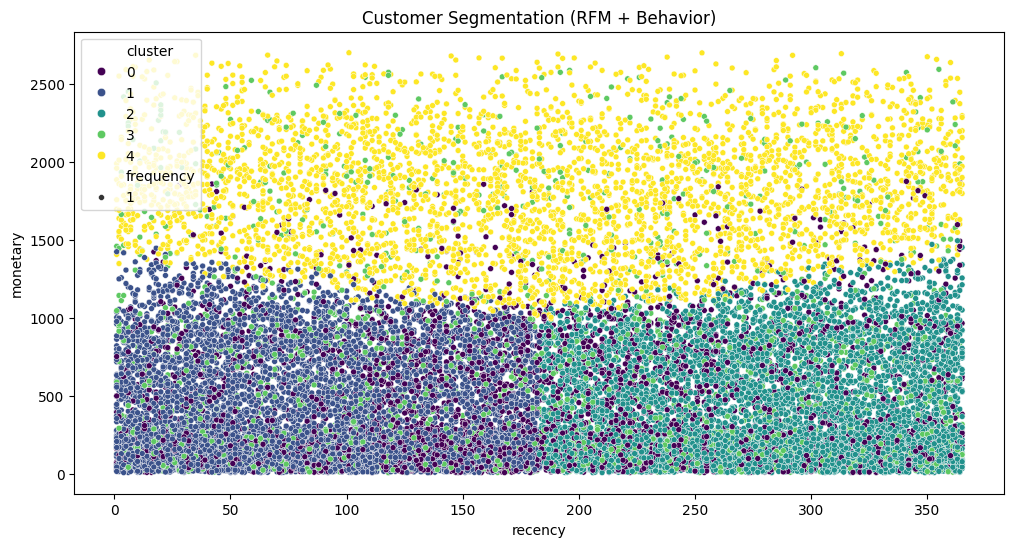

            recency  frequency     monetary  return_rate  avg_rating
cluster                                                             
0        184.528183        1.0   429.105484          0.0    2.087806
1         85.146449        1.0   403.324935          0.0    4.162890
2        281.310513        1.0   399.443190          0.0    4.168572
3        184.057294        1.0   616.013234          1.0    3.724502
4        183.394723        1.0  1796.875318          0.0    3.797606


In [ ]:
# RFM + Behavior Segmentation
def create_customer_segments(df):
    # Calculate RFM metrics
    snapshot_date = df['order_date'].max() + pd.Timedelta(days=1)
    rfm = df.groupby('customer_id').agg({
        'order_date': lambda x: (snapshot_date - x.max()).days,
        'order_id': 'count',
        'revenue': 'sum'
    }).rename(columns={
        'order_date': 'recency',
        'order_id': 'frequency',
        'revenue': 'monetary'
    })

    # Add behavioral metrics
    behavior = df.groupby('customer_id').agg({
        'is_returned': 'mean',
        'review_rating': 'mean'
    }).rename(columns={
        'is_returned': 'return_rate',
        'review_rating': 'avg_rating'
    })

    # Combine and scale features
    from sklearn.preprocessing import StandardScaler
    segments = pd.concat([rfm, behavior], axis=1)
    scaler = StandardScaler()
    segments_scaled = scaler.fit_transform(segments)

    # K-means clustering
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=5, random_state=42)
    segments['cluster'] = kmeans.fit_predict(segments_scaled)

    return segments

# Generate segments and analyze
segments = create_customer_segments(df)

# Visualize clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=segments, x='recency', y='monetary', hue='cluster', palette='viridis', size='frequency')
plt.title('Customer Segmentation (RFM + Behavior)')
plt.show()

# Cluster profiles
cluster_profiles = segments.groupby('cluster').mean()
print(cluster_profiles)

In [ ]:
#3.	Price Elasticity Estimation: Approximate sensitivity of quantity sold to price/discount changes.

Estimated Price Elasticity: -0.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


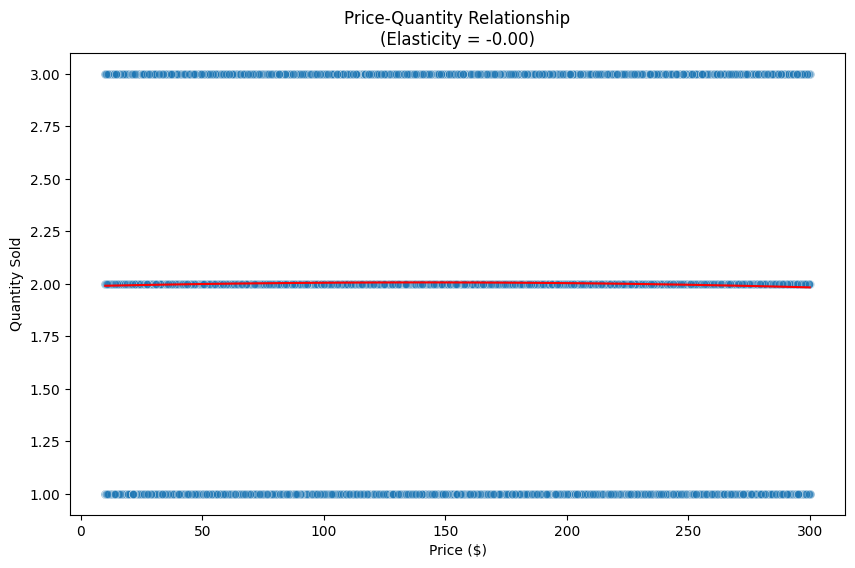

In [ ]:
# Price Elasticity Model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Prepare data
price_quantity = df.groupby(['product_id', 'price'])['quantity'].mean().reset_index()

# Polynomial features
poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(price_quantity[['price']])
y = price_quantity['quantity']

# Fit model
model = LinearRegression()
model.fit(X, y)

# Calculate elasticity at mean price
mean_price = price_quantity['price'].mean()
coef = model.coef_[1] + 2 * model.coef_[2] * mean_price
elasticity = (coef * mean_price) / price_quantity['quantity'].mean()

print(f"Estimated Price Elasticity: {elasticity:.2f}")

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=price_quantity, x='price', y='quantity', alpha=0.4)
x_range = np.linspace(price_quantity['price'].min(), price_quantity['price'].max(), 100)
X_range = poly.transform(x_range.reshape(-1, 1))
plt.plot(x_range, model.predict(X_range), color='red')
plt.title(f'Price-Quantity Relationship\n(Elasticity = {elasticity:.2f})')
plt.xlabel('Price ($)')
plt.ylabel('Quantity Sold')
plt.show()

In [ ]:
 #Build a simple logistic regression or decision tree prototype to predict whether an order will be returned (feature importance discussion suffices for EDA).

In [ ]:
# Return Prediction Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.metrics import RocCurveDisplay # Import RocCurveDisplay

# Feature engineering
X = df[[
    'price', 'discount_percent', 'quantity', 'review_rating',
    'delivery_days', 'customer_age_group', 'device_type', 'main_category'
]]
X = pd.get_dummies(X, columns=['customer_age_group', 'device_type', 'main_category'])
y = df['is_returned']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
print(classification_report(y_test, model.predict(X_test)))

# Plot ROC curve using RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve - Return Prediction')
plt.show()

# Feature importance
features = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=features.head(10), x='importance', y='feature')
plt.title('Top 10 Return Prediction Features')
plt.show()

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (/usr/local/lib/python3.11/dist-packages/sklearn/metrics/__init__.py)

In [ ]:
#5.	Anomaly Detection: Identify suspicious orders (e.g., extremely high discount with high quantity + immediate return).

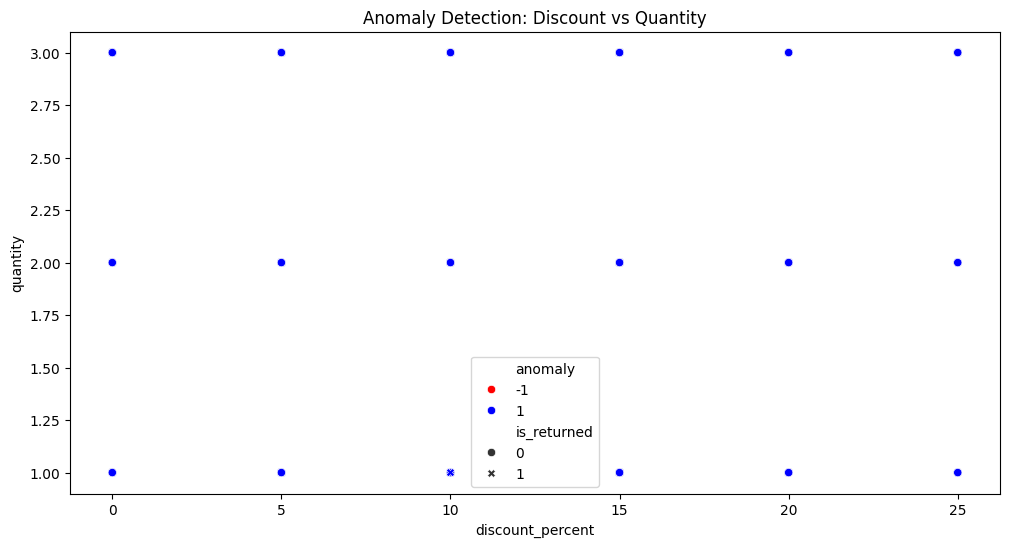

Found 250 suspicious orders
            order_id   customer_id  discount_percent  quantity  is_returned
193  #K5Q49M2HLRGT9H  9588A670A20A                 0         3            1
497  #VNH3G6YO8ZV4XP  86823AA7A574                25         3            1
604  #4UKDYGAF0J0MHC  83AA32227958                20         3            1
670  #NT89L0T786ESUU  7762830A6799                 0         2            1
809  #5F2WYP7WVI51VY  558993129A25                25         3            1


In [ ]:
# Anomaly Detection
from sklearn.ensemble import IsolationForest

# Create anomaly features
anomaly_data = df[['discount_percent', 'quantity', 'is_returned']].copy()
anomaly_data['return_speed'] = df['delivery_days'] / (df['order_date'].max() - df['order_date']).dt.days

# Train Isolation Forest
clf = IsolationForest(contamination=0.01, random_state=42)
anomaly_data['anomaly'] = clf.fit_predict(anomaly_data)

# Visualize anomalies
plt.figure(figsize=(12, 6))
sns.scatterplot(data=anomaly_data, x='discount_percent', y='quantity',
               hue='anomaly', style='is_returned', palette={1: 'blue', -1: 'red'})
plt.title('Anomaly Detection: Discount vs Quantity')
plt.show()

# Inspect suspicious orders
suspicious_orders = df[anomaly_data['anomaly'] == -1]
print(f"Found {len(suspicious_orders)} suspicious orders")
print(suspicious_orders[['order_id', 'customer_id', 'discount_percent', 'quantity', 'is_returned']].head())

In [ ]:
#6.	Time-to-Delivery Hotspots: Identify regions or product types with consistent delivery delays.

/tmp/ipython-input-2307861661.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delivery_by_region.values, y=delivery_by_region.index, palette='Reds_r')
/tmp/ipython-input-2307861661.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delivery_by_category.values, y=delivery_by_category.index, palette='Blues_r')


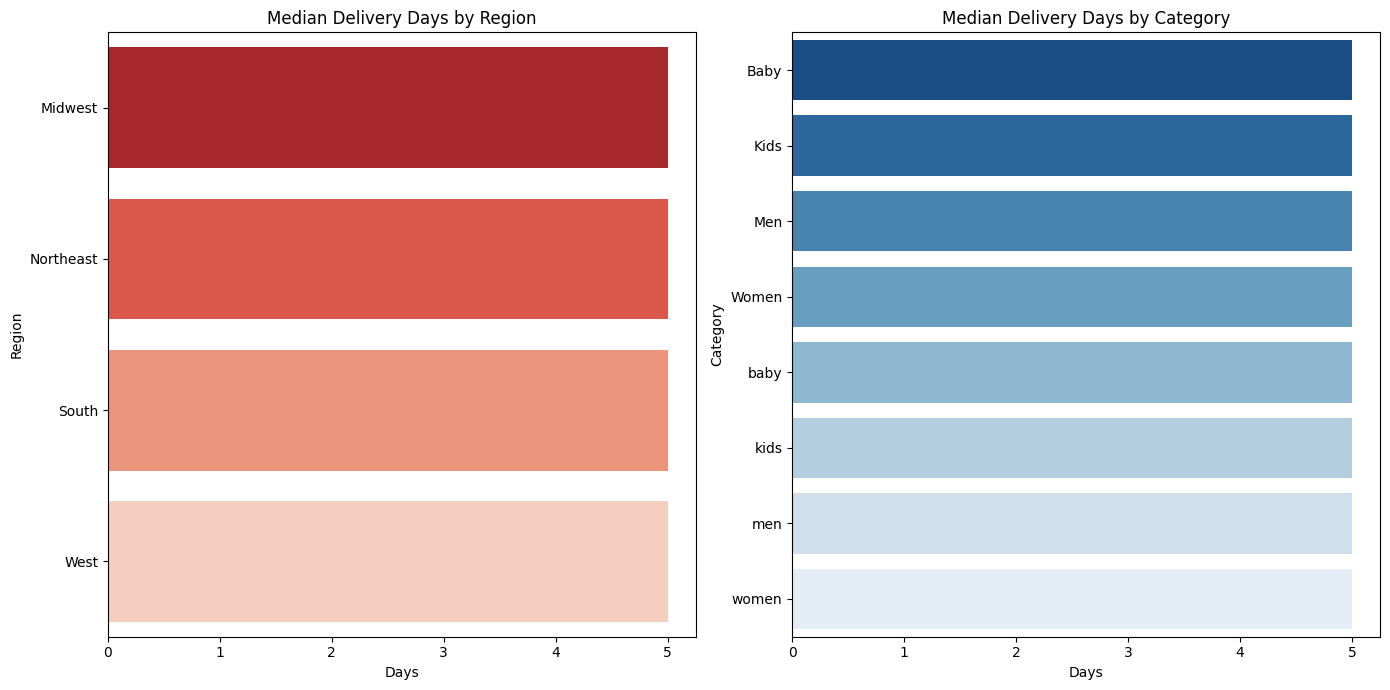

Kruskal-Wallis test for regional differences: H=2.4, p=0.4883


In [ ]:
# Delivery Hotspots
plt.figure(figsize=(14, 7))

# By region
plt.subplot(1, 2, 1)
delivery_by_region = df.groupby('region')['delivery_days'].median().sort_values()
sns.barplot(x=delivery_by_region.values, y=delivery_by_region.index, palette='Reds_r')
plt.title('Median Delivery Days by Region')
plt.xlabel('Days')
plt.ylabel('Region')

# By product category
plt.subplot(1, 2, 2)
delivery_by_category = df.groupby('main_category')['delivery_days'].median().sort_values()
sns.barplot(x=delivery_by_category.values, y=delivery_by_category.index, palette='Blues_r')
plt.title('Median Delivery Days by Category')
plt.xlabel('Days')
plt.ylabel('Category')

plt.tight_layout()
plt.show()

# Statistical test for worst performing regions
from scipy.stats import kruskal
regions = [group['delivery_days'].values for name, group in df.groupby('region')]
h_stat, p_value = kruskal(*regions)
print(f"Kruskal-Wallis test for regional differences: H={h_stat:.1f}, p={p_value:.4f}")